# I. 기본 RENET 모델

In [5]:
#import os
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # warning 메시지 숨기기

import tensorflow as tf
print("Is GPU available:", tf.test.is_gpu_available())

import tensorflow as tf
print('tf.__version__:',tf.__version__)

Is GPU available: True
tf.__version__: 2.13.0


2025-03-07 10:03:04.979964: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-03-07 10:03:04.981731: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-03-07 10:03:04.983196: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [6]:
tf.config.set_visible_devices([], 'GPU')

/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/30


2025-03-06 10:38:41.416791: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f84f0040a70 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2025-03-06 10:38:41.416850: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2025-03-06 10:38:41.426678: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-03-06 10:38:41.488994: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


225/225 [==============================] - 5s 10ms/step - loss: 0.6088 - accuracy: 0.7894 - val_loss: 0.6757 - val_accuracy: 0.8283
Epoch 2/30
225/225 [==============================] - 2s 8ms/step - loss: 0.3829 - accuracy: 0.8739 - val_loss: 0.3818 - val_accuracy: 0.8667
Epoch 3/30
225/225 [==============================] - 2s 9ms/step - loss: 0.3140 - accuracy: 0.8947 - val_loss: 0.3214 - val_accuracy: 0.8872
Epoch 4/30
225/225 [==============================] - 2s 8ms/step - loss: 0.2811 - accuracy: 0.9047 - val_loss: 0.2758 - val_accuracy: 0.9011
Epoch 5/30
225/225 [==============================] - 2s 8ms/step - loss: 0.2456 - accuracy: 0.9189 - val_loss: 0.2804 - val_accuracy: 0.9006
Epoch 6/30
225/225 [==============================] - 2s 9ms/step - loss: 0.2225 - accuracy: 0.9236 - val_loss: 0.2341 - val_accuracy: 0.9228
Epoch 7/30
225/225 [==============================] - 2s 9ms/step - loss: 0.2200 - accuracy: 0.9251 - val_loss: 0.2353 - val_accuracy: 0.9161
Epoch 8/30
225/2

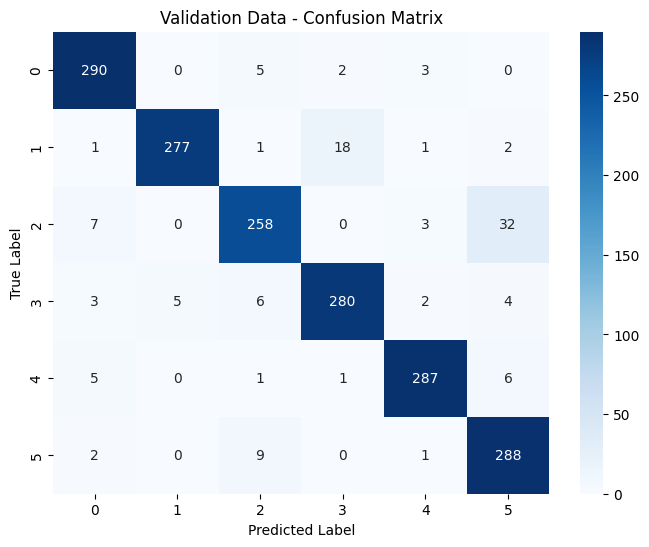


📊 Validation 데이터 평가 결과:
🔹 정확도 (Accuracy): 0.9333
🔹 정밀도 (Precision): 0.9349
🔹 재현율 (Recall): 0.9333
🔹 F1-Score: 0.9334

📜 Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95       300
           1       0.98      0.92      0.95       300
           2       0.92      0.86      0.89       300
           3       0.93      0.93      0.93       300
           4       0.97      0.96      0.96       300
           5       0.87      0.96      0.91       300

    accuracy                           0.93      1800
   macro avg       0.93      0.93      0.93      1800
weighted avg       0.93      0.93      0.93      1800

42/42 [==============================] - 0s 2ms/step


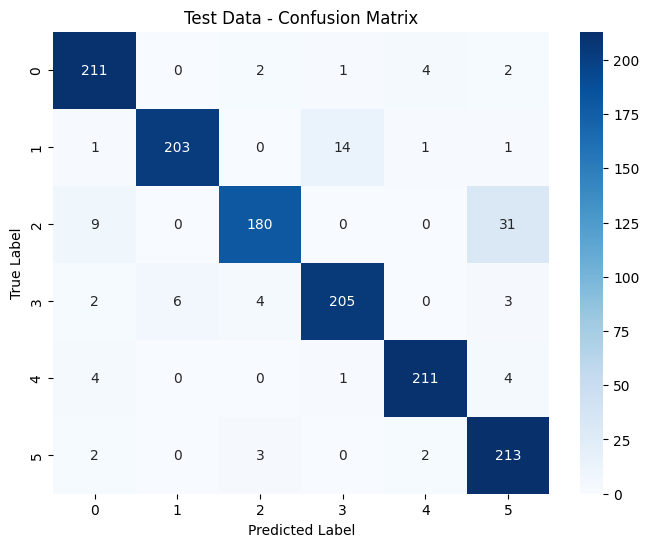


📊 Test 데이터 평가 결과:
🔹 정확도 (Accuracy): 0.9265
🔹 정밀도 (Precision): 0.9299
🔹 재현율 (Recall): 0.9265
🔹 F1-Score: 0.9264

📜 Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       220
           1       0.97      0.92      0.95       220
           2       0.95      0.82      0.88       220
           3       0.93      0.93      0.93       220
           4       0.97      0.96      0.96       220
           5       0.84      0.97      0.90       220

    accuracy                           0.93      1320
   macro avg       0.93      0.93      0.93      1320
weighted avg       0.93      0.93      0.93      1320



In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ 데이터 불러오기
train_file = "final_training_data_sampled_1500_ood_label.csv"
test_file = "final_test_data_sampled_220_ood_label.csv"

df_train = pd.read_csv(train_file)
df_test = pd.read_csv(test_file)

# 2️⃣ 데이터 전처리
# 'mfcc_1' ~ 'mfcc_50'까지 모든 MFCC 특성을 가져옴
mfcc_features = [col for col in df_train.columns if col.startswith('mfcc_')]
X = df_train[mfcc_features].values
y = df_train['ood_label'].values.reshape(-1, 1)

# One-Hot Encoding
encoder = OneHotEncoder(sparse=False)
y_encoded = encoder.fit_transform(y)

# Train / Validation Split (8:2)
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y)

# 3️⃣ ResNet 모델 정의
def build_resnet(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
    x = layers.Reshape((input_shape[0], 1))(inputs)
    
    # ResNet Block 1
    x = layers.Conv1D(32, kernel_size=3, padding="same", activation="relu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling1D(pool_size=2)(x)
    
    # ResNet Block 2
    x = layers.Conv1D(64, kernel_size=3, padding="same", activation="relu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling1D(pool_size=2)(x)
    
    # ResNet Block 3
    x = layers.Conv1D(128, kernel_size=3, padding="same", activation="relu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.GlobalAveragePooling1D()(x)
    
    # Fully Connected Layer
    outputs = layers.Dense(num_classes, activation="softmax")(x)
    
    model = keras.Model(inputs, outputs)
    return model

# 모델 생성
input_shape = (X_train.shape[1],)
num_classes = y_encoded.shape[1]
model = build_resnet(input_shape, num_classes)

# 모델 컴파일
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# 4️⃣ 모델 학습
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=32)

# 5️⃣ 평가 함수 정의 및 적용
def evaluate_and_plot(model, X, y_true, dataset_name="Validation"):
    """ 모델 평가 및 시각화 """
    y_pred_probs = model.predict(X)  # 예측 확률값
    y_pred = np.argmax(y_pred_probs, axis=1)  # 가장 높은 확률을 가진 클래스 선택
    
    # 🔹 y_true가 원-핫 인코딩 되어 있다면, 정수형 레이블로 변환
    if len(y_true.shape) > 1 and y_true.shape[1] > 1:
        y_true = np.argmax(y_true, axis=1)

    # 📌 1️⃣ 혼동 행렬 계산
    cm = confusion_matrix(y_true, y_pred)
    
    # 📌 2️⃣ 평가 지표 계산
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    # 📌 3️⃣ 혼동 행렬 시각화
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"{dataset_name} Data - Confusion Matrix")
    plt.show()

    # 📌 4️⃣ 평가 지표 출력
    print(f"\n📊 {dataset_name} 데이터 평가 결과:")
    print(f"🔹 정확도 (Accuracy): {acc:.4f}")
    print(f"🔹 정밀도 (Precision): {precision:.4f}")
    print(f"🔹 재현율 (Recall): {recall:.4f}")
    print(f"🔹 F1-Score: {f1:.4f}")
    print("\n📜 Classification Report:\n", classification_report(y_true, y_pred))

# 🔹 검증 데이터 평가
evaluate_and_plot(model, X_val, y_val, "Validation")

# 🔹 테스트 데이터 평가
X_test = df_test[mfcc_features].values
y_test = df_test['ood_label'].values.reshape(-1, 1)
y_test_encoded = encoder.transform(y_test)
evaluate_and_plot(model, X_test, y_test_encoded, "Test")

# II. 성능개선

## 1. 1차 성능 개선

/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/lab06/.local/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=50
  return f(*args, **kwargs)


Epoch 1/150


2025-03-06 10:59:46.618368: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f083c00d730 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2025-03-06 10:59:46.618422: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2025-03-06 10:59:46.625321: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-03-06 10:59:46.656446: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


4725/4725 [==============================] - 114s 23ms/step - loss: 0.3428 - accuracy: 0.8709 - val_loss: 0.2368 - val_accuracy: 0.9256 - lr: 0.0010
Epoch 2/150
4725/4725 [==============================] - 110s 23ms/step - loss: 0.1845 - accuracy: 0.9297 - val_loss: 0.3186 - val_accuracy: 0.8983 - lr: 0.0010
Epoch 3/150
4725/4725 [==============================] - 125s 26ms/step - loss: 0.1318 - accuracy: 0.9494 - val_loss: 0.2420 - val_accuracy: 0.9344 - lr: 0.0010
Epoch 4/150
4725/4725 [==============================] - 168s 36ms/step - loss: 0.1017 - accuracy: 0.9608 - val_loss: 0.2171 - val_accuracy: 0.9450 - lr: 0.0010
Epoch 5/150
4725/4725 [==============================] - 154s 33ms/step - loss: 0.0836 - accuracy: 0.9682 - val_loss: 0.2560 - val_accuracy: 0.9450 - lr: 0.0010
Epoch 6/150
4725/4725 [==============================] - 161s 34ms/step - loss: 0.0707 - accuracy: 0.9729 - val_loss: 0.2920 - val_accuracy: 0.9389 - lr: 0.0010
Epoch 7/150
4725/4725 [=======================

/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/utils.py:61: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.draw()
/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/utils.py:61: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  fig.canvas.draw()
/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/utils.py:61: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.draw()
/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/utils.py:61: UserWarning: Glyph 51020 (\N{HANGUL SYLLABLE EUM}) missing from current font.
  fig.canvas.draw()
/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/utils.py:61: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.draw()
/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/utils.py:61: UserWarning

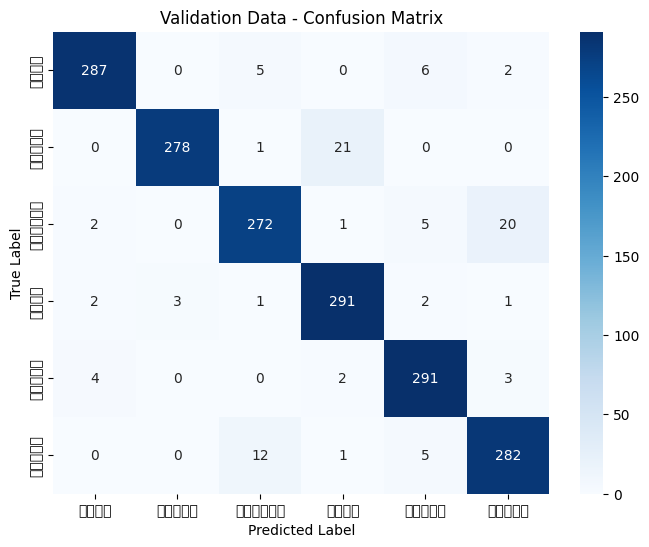


 Validation 데이터 평가 결과:
 정확도 (Accuracy): 0.9450
 정밀도 (Precision): 0.9459
 재현율 (Recall): 0.9450
 F1-Score: 0.9450

 Classification Report:
               precision    recall  f1-score   support

        기타소음       0.97      0.96      0.96       300
       이륜차경적       0.99      0.93      0.96       300
      이륜차주행음       0.93      0.91      0.92       300
        차량경적       0.92      0.97      0.94       300
       차량사이렌       0.94      0.97      0.96       300
       차량주행음       0.92      0.94      0.93       300

    accuracy                           0.94      1800
   macro avg       0.95      0.94      0.95      1800
weighted avg       0.95      0.94      0.95      1800

42/42 [==============================] - 1s 15ms/step


/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/utils.py:61: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.draw()
/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/utils.py:61: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  fig.canvas.draw()
/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/utils.py:61: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.draw()
/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/utils.py:61: UserWarning: Glyph 51020 (\N{HANGUL SYLLABLE EUM}) missing from current font.
  fig.canvas.draw()
/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/utils.py:61: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.draw()
/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/utils.py:61: UserWarning

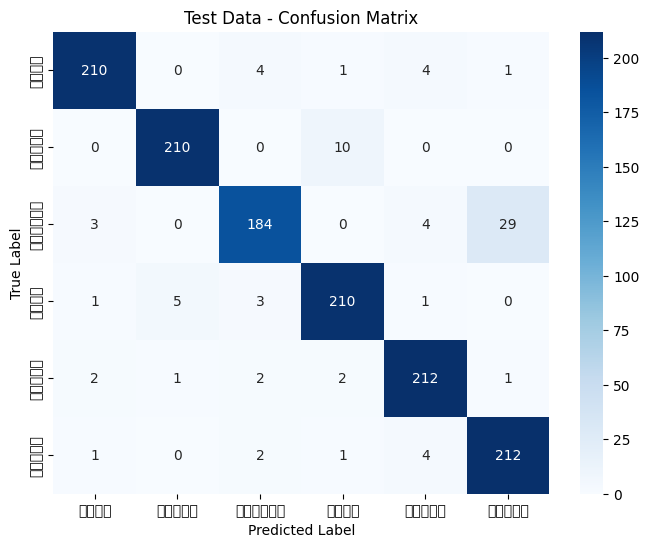


 Test 데이터 평가 결과:
 정확도 (Accuracy): 0.9379
 정밀도 (Precision): 0.9393
 재현율 (Recall): 0.9379
 F1-Score: 0.9376

 Classification Report:
               precision    recall  f1-score   support

        기타소음       0.97      0.95      0.96       220
       이륜차경적       0.97      0.95      0.96       220
      이륜차주행음       0.94      0.84      0.89       220
        차량경적       0.94      0.95      0.95       220
       차량사이렌       0.94      0.96      0.95       220
       차량주행음       0.87      0.96      0.92       220

    accuracy                           0.94      1320
   macro avg       0.94      0.94      0.94      1320
weighted avg       0.94      0.94      0.94      1320



In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
from sklearn.utils import class_weight

# 1️⃣ 데이터 불러오기
train_file = "final_training_data_sampled_1500_ood_label.csv"
test_file = "final_test_data_sampled_220_ood_label.csv"

df_train = pd.read_csv(train_file)
df_test = pd.read_csv(test_file)

# 2️⃣ 데이터 전처리
mfcc_features = [col for col in df_train.columns if col.startswith('mfcc_')]
X = df_train[mfcc_features].values
y = df_train['ood_label'].values.reshape(-1, 1)

encoder = OneHotEncoder(sparse=False)
y_encoded = encoder.fit_transform(y)

X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y)

# 3️⃣ 데이터 증강 함수
def augment_audio(audio, sr, shift_range=0.2, pitch_range=3, noise_level=0.02, time_stretch_range=0.1):
    shift = int(np.random.uniform(low=-shift_range, high=shift_range) * len(audio))
    audio_shifted = np.roll(audio, shift)
    pitch_factor = np.random.uniform(low=-pitch_range, high=pitch_range)
    audio_pitched = librosa.effects.pitch_shift(audio, sr=sr, n_steps=pitch_factor)
    noise = np.random.normal(0, noise_level, len(audio))
    audio_noisy = audio + noise
    time_stretch_factor = np.random.uniform(low=1-time_stretch_range, high=1+time_stretch_range)
    audio_time_stretched = librosa.effects.time_stretch(audio, rate=time_stretch_factor)
    if len(audio_time_stretched) < len(audio):
        audio_time_stretched = np.pad(audio_time_stretched, (0, len(audio) - len(audio_time_stretched)), 'constant')
    else:
        audio_time_stretched = audio_time_stretched[:len(audio)]
    return audio_shifted, audio_pitched, audio_noisy, audio_time_stretched

# 4️⃣ 데이터 증강 적용
X_train_augmented = []
y_train_augmented = []

for i in range(len(X_train)):
    audio = X_train[i].flatten()
    label = y_train[i]
    label_index = np.argmax(label)

    if label_index == 2:
        for _ in range(7):
            audio_shifted, audio_pitched, audio_noisy, audio_time_stretched = augment_audio(audio, sr=22050)
            X_train_augmented.extend([audio_shifted.reshape(50, 1), audio_pitched.reshape(50, 1), audio_noisy.reshape(50, 1), audio_time_stretched.reshape(50, 1)])
            y_train_augmented.extend([label, label, label, label])
    elif label_index == 5:
        for _ in range(7):
            audio_shifted, audio_pitched, audio_noisy, audio_time_stretched = augment_audio(audio, sr=22050)
            X_train_augmented.extend([audio_shifted.reshape(50, 1), audio_pitched.reshape(50, 1), audio_noisy.reshape(50, 1), audio_time_stretched.reshape(50, 1)])
            y_train_augmented.extend([label, label, label, label])
    elif label_index == 1:
        for _ in range(3):
            audio_shifted, audio_pitched, audio_noisy, audio_time_stretched = augment_audio(audio, sr=22050)
            X_train_augmented.extend([audio_shifted.reshape(50, 1), audio_pitched.reshape(50, 1), audio_noisy.reshape(50, 1), audio_time_stretched.reshape(50, 1)])
            y_train_augmented.extend([label, label, label, label])
    elif label_index == 4:
        for _ in range(3):
            audio_shifted, audio_pitched, audio_noisy, audio_time_stretched = augment_audio(audio, sr=22050)
            X_train_augmented.extend([audio_shifted.reshape(50, 1), audio_pitched.reshape(50, 1), audio_noisy.reshape(50, 1), audio_time_stretched.reshape(50, 1)])
            y_train_augmented.extend([label, label, label, label])
    else:
        for _ in range(5):
            audio_shifted, audio_pitched, audio_noisy, audio_time_stretched = augment_audio(audio, sr=22050)
            X_train_augmented.extend([audio_shifted.reshape(50, 1), audio_pitched.reshape(50, 1), audio_noisy.reshape(50, 1), audio_time_stretched.reshape(50, 1)])
            y_train_augmented.extend([label, label, label, label])

    X_train_augmented.append(X_train[i].reshape(50, 1))
    y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

# 5️⃣ ResNet 모델 정의
def residual_block(x, filters, kernel_size=3, stride=1):
    shortcut = x
    x = layers.Conv1D(filters, kernel_size, strides=stride, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv1D(filters, kernel_size, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    if shortcut.shape[-1] != filters:
        shortcut = layers.Conv1D(filters, 1, strides=stride, padding='same')(shortcut)
    x = layers.Add()([x, shortcut])
    x = layers.Activation('relu')(x)
    return x

def build_resnet(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
    x = layers.Conv1D(64, 7, strides=2, padding='same', activation='relu')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling1D(3, strides=2, padding='same')(x)  # MaxPooling 추가

    # Residual Blocks
    x = residual_block(x, 64)
    x = residual_block(x, 128, stride=2)
    x = residual_block(x, 256, stride=2)
    x = residual_block(x, 512, stride=2)

    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)
    return keras.Model(inputs, x)

# 6️⃣ 모델 생성 및 컴파일
resnet_model = build_resnet((50, 1), y_encoded.shape[1])
optimizer = keras.optimizers.Adam(learning_rate=0.001)
resnet_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# 7️⃣ 모델 학습
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.00001)
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(np.argmax(y_train_augmented, axis=1)), y=np.argmax(y_train_augmented, axis=1))
class_weights_dict = dict(enumerate(class_weights))

history = resnet_model.fit(X_train_augmented, y_train_augmented, epochs=150, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping, reduce_lr], class_weight=class_weights_dict)

# 8️⃣ 평가 함수 정의 및 적용
def evaluate_and_plot(model, X, y_true, dataset_name="Validation"):
    """ 모델 평가 및 시각화 """
    y_pred_probs = model.predict(X)
    y_pred = np.argmax(y_pred_probs, axis=1)

    if len(y_true.shape) > 1 and y_true.shape[1] > 1:
        y_true = np.argmax(y_true, axis=1)

    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    # 라벨 이름 가져오기
    labels = encoder.categories_[0].tolist()

    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"{dataset_name} Data - Confusion Matrix")
    plt.show()

    print(f"\n {dataset_name} 데이터 평가 결과:")
    print(f" 정확도 (Accuracy): {acc:.4f}")
    print(f" 정밀도 (Precision): {precision:.4f}")
    print(f" 재현율 (Recall): {recall:.4f}")
    print(f" F1-Score: {f1:.4f}")
    print("\n Classification Report:\n", classification_report(y_true, y_pred, target_names=labels))

#  검증 데이터 평가
evaluate_and_plot(resnet_model, X_val, y_val, "Validation")

#  테스트 데이터 평가
X_test = df_test[mfcc_features].values.reshape(-1, 50, 1)
y_test = df_test['ood_label'].values.reshape(-1, 1)
y_test_encoded = encoder.transform(y_test)
evaluate_and_plot(resnet_model, X_test, y_test_encoded, "Test")

## 2. 2차 성능개선

/home/lab06/.local/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=50
  return f(*args, **kwargs)
/home/lab06/.local/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=50
  return f(*args, **kwargs)


Epoch 1/150


2025-03-06 13:24:17.654244: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f85541bba10 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2025-03-06 13:24:17.654301: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2025-03-06 13:24:17.747532: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-03-06 13:24:18.039829: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


4725/4725 [==============================] - 180s 37ms/step - loss: 0.3513 - accuracy: 0.8678 - val_loss: 0.1987 - val_accuracy: 0.9389 - lr: 0.0010
Epoch 2/150
4725/4725 [==============================] - 179s 38ms/step - loss: 0.1843 - accuracy: 0.9310 - val_loss: 0.2167 - val_accuracy: 0.9372 - lr: 0.0010
Epoch 3/150
4725/4725 [==============================] - 175s 37ms/step - loss: 0.1346 - accuracy: 0.9490 - val_loss: 0.2075 - val_accuracy: 0.9389 - lr: 0.0010
Epoch 4/150
4725/4725 [==============================] - 174s 37ms/step - loss: 0.1017 - accuracy: 0.9613 - val_loss: 0.2402 - val_accuracy: 0.9406 - lr: 0.0010
Epoch 5/150
4725/4725 [==============================] - 150s 32ms/step - loss: 0.0836 - accuracy: 0.9678 - val_loss: 0.2604 - val_accuracy: 0.9344 - lr: 0.0010
Epoch 6/150
4725/4725 [==============================] - 144s 30ms/step - loss: 0.0703 - accuracy: 0.9732 - val_loss: 0.2851 - val_accuracy: 0.9400 - lr: 0.0010
Epoch 7/150
4725/4725 [=======================

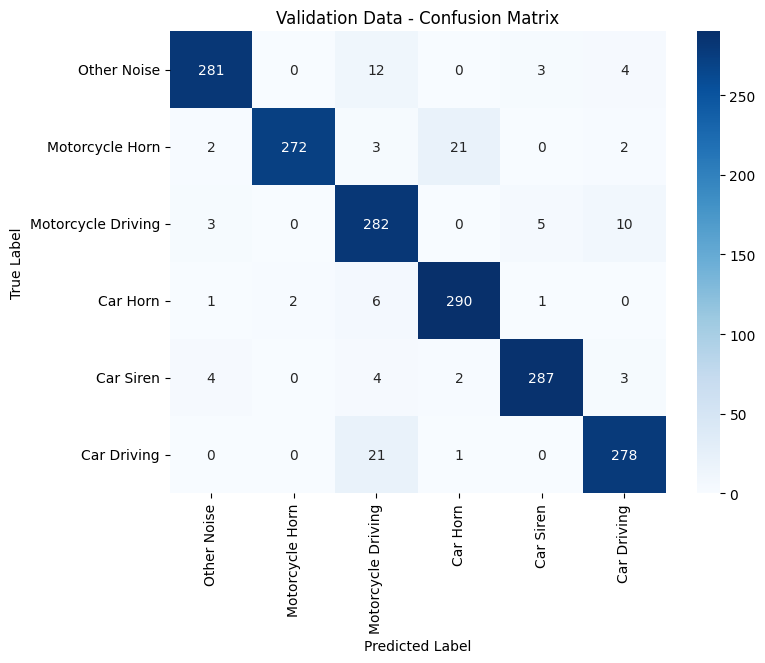


 Validation 데이터 평가 결과:
 정확도 (Accuracy): 0.9389
 정밀도 (Precision): 0.9412
 재현율 (Recall): 0.9389
 F1-Score: 0.9393

 Classification Report:
                     precision    recall  f1-score   support

       Other Noise       0.97      0.94      0.95       300
   Motorcycle Horn       0.99      0.91      0.95       300
Motorcycle Driving       0.86      0.94      0.90       300
          Car Horn       0.92      0.97      0.94       300
         Car Siren       0.97      0.96      0.96       300
       Car Driving       0.94      0.93      0.93       300

          accuracy                           0.94      1800
         macro avg       0.94      0.94      0.94      1800
      weighted avg       0.94      0.94      0.94      1800

42/42 [==============================] - 1s 7ms/step


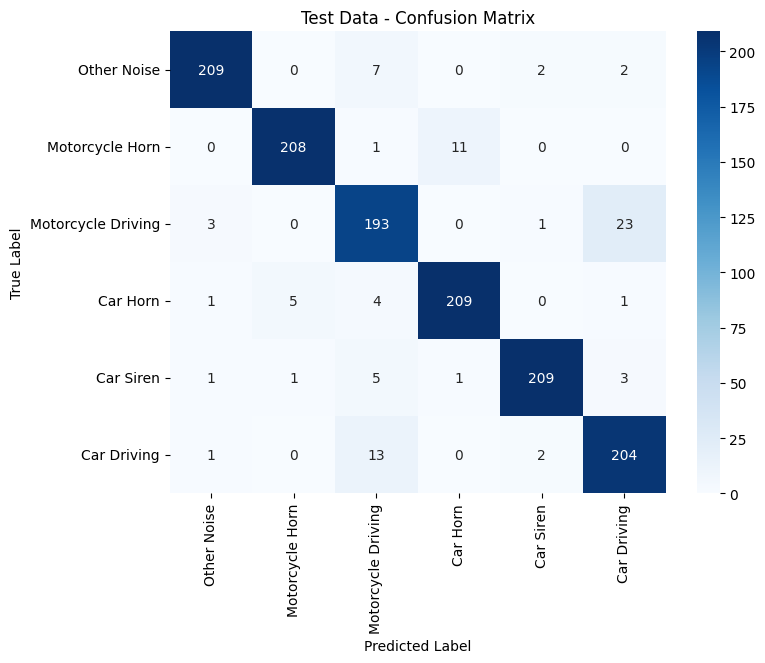


 Test 데이터 평가 결과:
 정확도 (Accuracy): 0.9333
 정밀도 (Precision): 0.9346
 재현율 (Recall): 0.9333
 F1-Score: 0.9337

 Classification Report:
                     precision    recall  f1-score   support

       Other Noise       0.97      0.95      0.96       220
   Motorcycle Horn       0.97      0.95      0.96       220
Motorcycle Driving       0.87      0.88      0.87       220
          Car Horn       0.95      0.95      0.95       220
         Car Siren       0.98      0.95      0.96       220
       Car Driving       0.88      0.93      0.90       220

          accuracy                           0.93      1320
         macro avg       0.93      0.93      0.93      1320
      weighted avg       0.93      0.93      0.93      1320



In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
from sklearn.utils import class_weight

# 1️⃣ 데이터 불러오기
train_file = "final_training_data_sampled_1500_ood_label.csv"
test_file = "final_test_data_sampled_220_ood_label.csv"

df_train = pd.read_csv(train_file)
df_test = pd.read_csv(test_file)

# 2️⃣ 데이터 전처리
mfcc_features = [col for col in df_train.columns if col.startswith('mfcc_')]
X = df_train[mfcc_features].values
y = df_train['ood_label'].values.reshape(-1, 1)

encoder = OneHotEncoder(sparse_output=False) # sparse 매개변수 수정
y_encoded = encoder.fit_transform(y)

X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y)

# 3️⃣ 데이터 증강 함수 (이전 코드와 동일)
def augment_audio(audio, sr, shift_range=0.2, pitch_range=3, noise_level=0.02, time_stretch_range=0.1):
    shift = int(np.random.uniform(low=-shift_range, high=shift_range) * len(audio))
    audio_shifted = np.roll(audio, shift)
    pitch_factor = np.random.uniform(low=-pitch_range, high=pitch_range)
    audio_pitched = librosa.effects.pitch_shift(audio, sr=sr, n_steps=pitch_factor)
    noise = np.random.normal(0, noise_level, len(audio))
    audio_noisy = audio + noise
    time_stretch_factor = np.random.uniform(low=1-time_stretch_range, high=1+time_stretch_range)
    audio_time_stretched = librosa.effects.time_stretch(audio, rate=time_stretch_factor)
    if len(audio_time_stretched) < len(audio):
        audio_time_stretched = np.pad(audio_time_stretched, (0, len(audio) - len(audio_time_stretched)), 'constant')
    else:
        audio_time_stretched = audio_time_stretched[:len(audio)]
    return audio_shifted, audio_pitched, audio_noisy, audio_time_stretched

# 4️⃣ 데이터 증강 적용 (이전 코드와 동일)
X_train_augmented = []
y_train_augmented = []

for i in range(len(X_train)):
    audio = X_train[i].flatten()
    label = y_train[i]
    label_index = np.argmax(label)

    if label_index == 2:
        for _ in range(7):
            audio_shifted, audio_pitched, audio_noisy, audio_time_stretched = augment_audio(audio, sr=22050)
            X_train_augmented.extend([audio_shifted.reshape(50, 1), audio_pitched.reshape(50, 1), audio_noisy.reshape(50, 1), audio_time_stretched.reshape(50, 1)])
            y_train_augmented.extend([label, label, label, label])
    elif label_index == 5:
        for _ in range(7):
            audio_shifted, audio_pitched, audio_noisy, audio_time_stretched = augment_audio(audio, sr=22050)
            X_train_augmented.extend([audio_shifted.reshape(50, 1), audio_pitched.reshape(50, 1), audio_noisy.reshape(50, 1), audio_time_stretched.reshape(50, 1)])
            y_train_augmented.extend([label, label, label, label])
    elif label_index == 1:
        for _ in range(3):
            audio_shifted, audio_pitched, audio_noisy, audio_time_stretched = augment_audio(audio, sr=22050)
            X_train_augmented.extend([audio_shifted.reshape(50, 1), audio_pitched.reshape(50, 1), audio_noisy.reshape(50, 1), audio_time_stretched.reshape(50, 1)])
            y_train_augmented.extend([label, label, label, label])
    elif label_index == 4:
        for _ in range(3):
            audio_shifted, audio_pitched, audio_noisy, audio_time_stretched = augment_audio(audio, sr=22050)
            X_train_augmented.extend([audio_shifted.reshape(50, 1), audio_pitched.reshape(50, 1), audio_noisy.reshape(50, 1), audio_time_stretched.reshape(50, 1)])
            y_train_augmented.extend([label, label, label, label])
    else:
        for _ in range(5):
            audio_shifted, audio_pitched, audio_noisy, audio_time_stretched = augment_audio(audio, sr=22050)
            X_train_augmented.extend([audio_shifted.reshape(50, 1), audio_pitched.reshape(50, 1), audio_noisy.reshape(50, 1), audio_time_stretched.reshape(50, 1)])
            y_train_augmented.extend([label, label, label, label])

    X_train_augmented.append(X_train[i].reshape(50, 1))
    y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

# 5️⃣ ResNet 모델 정의 (이전 코드와 동일)
def residual_block(x, filters, kernel_size=3, stride=1):
    shortcut = x
    x = layers.Conv1D(filters, kernel_size, strides=stride, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv1D(filters, kernel_size, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    if shortcut.shape[-1] != filters:
        shortcut = layers.Conv1D(filters, 1, strides=stride, padding='same')(shortcut)
    x = layers.Add()([x, shortcut])
    x = layers.Activation('relu')(x)
    return x

def build_resnet(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
    x = layers.Conv1D(64, 7, strides=2, padding='same', activation='relu')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling1D(3, strides=2, padding='same')(x)
    x = residual_block(x, 64)
    x = residual_block(x, 128, stride=2)
    x = residual_block(x, 256, stride=2)
    x = residual_block(x, 512, stride=2)
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)
    return keras.Model(inputs, x)

# 6️⃣ 모델 생성 및 컴파일 (이전 코드와 동일)
resnet_model = build_resnet((50, 1), y_encoded.shape[1])
optimizer = keras.optimizers.Adam(learning_rate=0.001)
resnet_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# 7️⃣ 모델 학습 (이전 코드와 동일)
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.00001)
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(np.argmax(y_train_augmented, axis=1)), y=np.argmax(y_train_augmented, axis=1))
class_weights_dict = dict(enumerate(class_weights))

history = resnet_model.fit(X_train_augmented, y_train_augmented, epochs=150, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping, reduce_lr], class_weight=class_weights_dict)

# 8️⃣ 평가 함수 정의 및 적용 (라벨을 영어로 변경)
def evaluate_and_plot(model, X, y_true, dataset_name="Validation"):
    """ 모델 평가 및 시각화 """
    y_pred_probs = model.predict(X)
    y_pred = np.argmax(y_pred_probs, axis=1)

    if len(y_true.shape) > 1 and y_true.shape[1] > 1:
        y_true = np.argmax(y_true, axis=1)

    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    # 라벨 이름을 영어로 변경
    labels = ["Other Noise", "Motorcycle Horn", "Motorcycle Driving", "Car Horn", "Car Siren", "Car Driving"]

    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"{dataset_name} Data - Confusion Matrix")
    plt.show()

    print(f"\n {dataset_name} 데이터 평가 결과:")
    print(f" 정확도 (Accuracy): {acc:.4f}")
    print(f" 정밀도 (Precision): {precision:.4f}")
    print(f" 재현율 (Recall): {recall:.4f}")
    print(f" F1-Score: {f1:.4f}")
    print("\n Classification Report:\n", classification_report(y_true, y_pred, target_names=labels))

#  검증 데이터 평가
evaluate_and_plot(resnet_model, X_val, y_val, "Validation")

#  테스트 데이터 평가
X_test = df_test[mfcc_features].values.reshape(-1, 50, 1)
y_test = df_test['ood_label'].values.reshape(-1, 1)
y_test_encoded = encoder.transform(y_test)
evaluate_and_plot(resnet_model, X_test, y_test_encoded, "Test")

## 3. 3차 성능개선

/home/lab06/.local/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=50
  return f(*args, **kwargs)
/home/lab06/.local/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=50
  return f(*args, **kwargs)


Epoch 1/150


2025-03-06 14:25:54.421258: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f533c1b9ae0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2025-03-06 14:25:54.421305: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2025-03-06 14:25:54.427874: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-03-06 14:25:54.460518: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1125/1125 [==============================] - 33s 26ms/step - loss: 0.5507 - accuracy: 0.8025 - val_loss: 0.3271 - val_accuracy: 0.8850 - lr: 0.0010
Epoch 2/150
1125/1125 [==============================] - 29s 25ms/step - loss: 0.3157 - accuracy: 0.8866 - val_loss: 0.2926 - val_accuracy: 0.9089 - lr: 0.0010
Epoch 3/150
1125/1125 [==============================] - 29s 26ms/step - loss: 0.2604 - accuracy: 0.9056 - val_loss: 0.1794 - val_accuracy: 0.9422 - lr: 0.0010
Epoch 4/150
1125/1125 [==============================] - 29s 25ms/step - loss: 0.2201 - accuracy: 0.9227 - val_loss: 0.3079 - val_accuracy: 0.9000 - lr: 0.0010
Epoch 5/150
1125/1125 [==============================] - 28s 25ms/step - loss: 0.1934 - accuracy: 0.9303 - val_loss: 0.2590 - val_accuracy: 0.9178 - lr: 0.0010
Epoch 6/150
1125/1125 [==============================] - 28s 25ms/step - loss: 0.1733 - accuracy: 0.9370 - val_loss: 0.2143 - val_accuracy: 0.9372 - lr: 0.0010
Epoch 7/150
1125/1125 [=============================

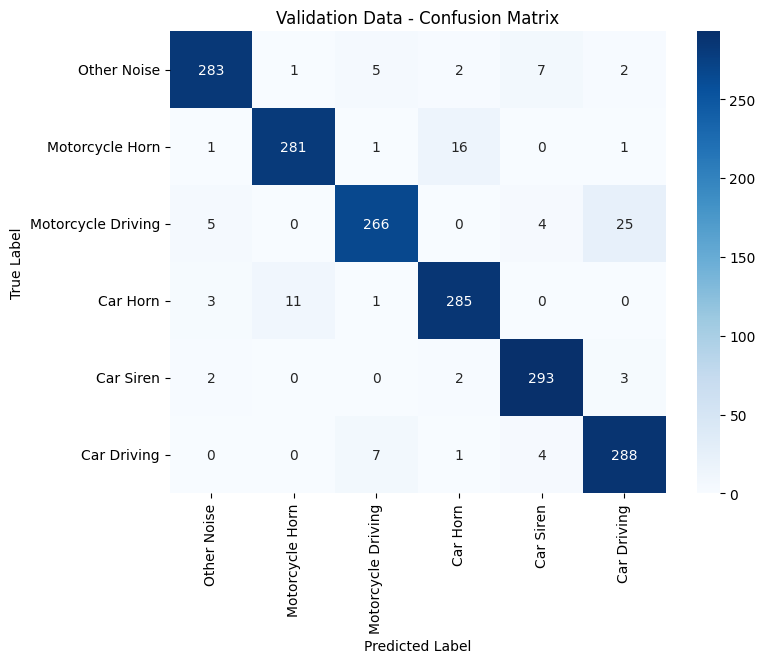


 Validation 데이터 평가 결과:
 정확도 (Accuracy): 0.9422
 정밀도 (Precision): 0.9429
 재현율 (Recall): 0.9422
 F1-Score: 0.9421

 Classification Report:
                     precision    recall  f1-score   support

       Other Noise       0.96      0.94      0.95       300
   Motorcycle Horn       0.96      0.94      0.95       300
Motorcycle Driving       0.95      0.89      0.92       300
          Car Horn       0.93      0.95      0.94       300
         Car Siren       0.95      0.98      0.96       300
       Car Driving       0.90      0.96      0.93       300

          accuracy                           0.94      1800
         macro avg       0.94      0.94      0.94      1800
      weighted avg       0.94      0.94      0.94      1800

42/42 [==============================] - 1s 6ms/step


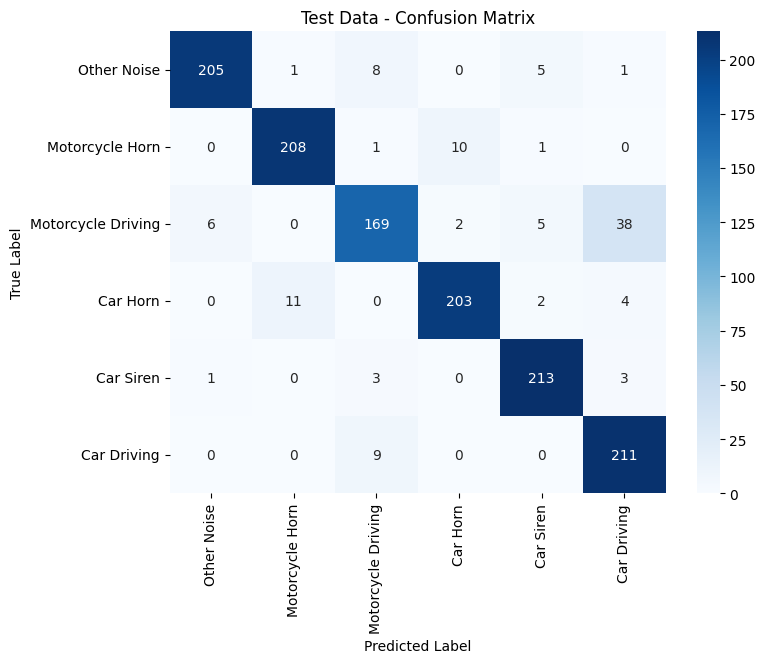


 Test 데이터 평가 결과:
 정확도 (Accuracy): 0.9159
 정밀도 (Precision): 0.9183
 재현율 (Recall): 0.9159
 F1-Score: 0.9154

 Classification Report:
                     precision    recall  f1-score   support

       Other Noise       0.97      0.93      0.95       220
   Motorcycle Horn       0.95      0.95      0.95       220
Motorcycle Driving       0.89      0.77      0.82       220
          Car Horn       0.94      0.92      0.93       220
         Car Siren       0.94      0.97      0.96       220
       Car Driving       0.82      0.96      0.88       220

          accuracy                           0.92      1320
         macro avg       0.92      0.92      0.92      1320
      weighted avg       0.92      0.92      0.92      1320



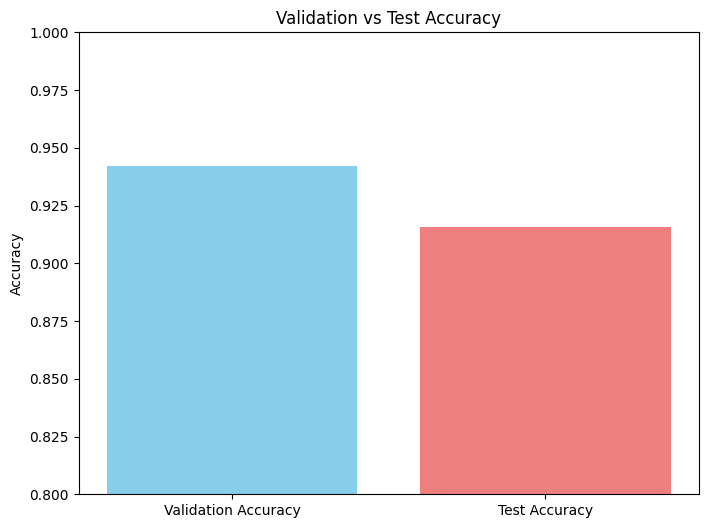

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
from sklearn.utils import class_weight

# 1️⃣ 데이터 불러오기
train_file = "final_training_data_sampled_1500_ood_label.csv"
test_file = "final_test_data_sampled_220_ood_label.csv"

df_train = pd.read_csv(train_file)
df_test = pd.read_csv(test_file)

# 2️⃣ 데이터 전처리
mfcc_features = [col for col in df_train.columns if col.startswith('mfcc_')]
X = df_train[mfcc_features].values
y = df_train['ood_label'].values.reshape(-1, 1)

encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)

X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y)

# 3️⃣ 데이터 증강 함수 (수정됨)
def augment_audio(audio, sr, shift_range=0.1, pitch_range=2, noise_level=0.01, time_stretch_range=0.05):
    audio_augmented = []
    # 시간 이동
    shift = int(np.random.uniform(low=-shift_range, high=shift_range) * len(audio))
    audio_shifted = np.roll(audio, shift)
    audio_augmented.append(audio_shifted)
    # 피치 변경
    pitch_factor = np.random.uniform(low=-pitch_range, high=pitch_range)
    audio_pitched = librosa.effects.pitch_shift(audio, sr=sr, n_steps=pitch_factor)
    audio_augmented.append(audio_pitched)
    # 노이즈 추가
    noise = np.random.normal(0, noise_level, len(audio))
    audio_noisy = audio + noise
    audio_augmented.append(audio_noisy)
    # 시간 스트레칭
    time_stretch_factor = np.random.uniform(low=1-time_stretch_range, high=1+time_stretch_range)
    audio_time_stretched = librosa.effects.time_stretch(audio, rate=time_stretch_factor)
    if len(audio_time_stretched) < len(audio):
        audio_time_stretched = np.pad(audio_time_stretched, (0, len(audio) - len(audio_time_stretched)), 'constant')
    else:
        audio_time_stretched = audio_time_stretched[:len(audio)]
    audio_augmented.append(audio_time_stretched)
    return audio_augmented

# 4️⃣ 데이터 증강 적용 (수정됨)
X_train_augmented = []
y_train_augmented = []

for i in range(len(X_train)):
    audio = X_train[i].flatten()
    label = y_train[i]
    label_index = np.argmax(label)

    augmented_audios = augment_audio(audio, sr=22050)
    for aug_audio in augmented_audios:
        X_train_augmented.append(aug_audio.reshape(50, 1))
        y_train_augmented.append(label)

    X_train_augmented.append(X_train[i].reshape(50, 1))
    y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

# 5️⃣ ResNet 모델 정의 (수정됨)
def residual_block(x, filters, kernel_size=3, stride=1, use_dropout=False):
    shortcut = x
    x = layers.Conv1D(filters, kernel_size, strides=stride, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    if use_dropout:
        x = layers.Dropout(0.2)(x)
    x = layers.Conv1D(filters, kernel_size, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    if shortcut.shape[-1] != filters:
        shortcut = layers.Conv1D(filters, 1, strides=stride, padding='same')(shortcut)
    x = layers.Add()([x, shortcut])
    x = layers.Activation('relu')(x)
    return x

def build_resnet(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
    x = layers.Conv1D(64, 7, strides=2, padding='same', activation='relu')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling1D(3, strides=2, padding='same')(x)
    x = residual_block(x, 64, use_dropout=True)
    x = residual_block(x, 128, stride=2, use_dropout=True)
    x = residual_block(x, 256, stride=2, use_dropout=True)
    x = residual_block(x, 512, stride=2, use_dropout=True)
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)
    return keras.Model(inputs, x)
# 6️⃣ 모델 생성 및 컴파일
resnet_model = build_resnet((50, 1), y_encoded.shape[1])
optimizer = keras.optimizers.Adam(learning_rate=0.001)
resnet_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# 7️⃣ 모델 학습
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.00001)
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(np.argmax(y_train_augmented, axis=1)), y=np.argmax(y_train_augmented, axis=1))
class_weights_dict = dict(enumerate(class_weights))

history = resnet_model.fit(X_train_augmented, y_train_augmented, epochs=150, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping, reduce_lr], class_weight=class_weights_dict)

# 8️⃣ 평가 함수 정의 및 적용 (라벨을 영어로 변경)
def evaluate_and_plot(model, X, y_true, dataset_name="Validation"):
    """ 모델 평가 및 시각화 """
    y_pred_probs = model.predict(X)
    y_pred = np.argmax(y_pred_probs, axis=1)

    if len(y_true.shape) > 1 and y_true.shape[1] > 1:
        y_true = np.argmax(y_true, axis=1)

    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    # 라벨 이름을 영어로 변경
    labels = ["Other Noise", "Motorcycle Horn", "Motorcycle Driving", "Car Horn", "Car Siren", "Car Driving"]

    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"{dataset_name} Data - Confusion Matrix")
    plt.show()

    print(f"\n {dataset_name} 데이터 평가 결과:")
    print(f" 정확도 (Accuracy): {acc:.4f}")
    print(f" 정밀도 (Precision): {precision:.4f}")
    print(f" 재현율 (Recall): {recall:.4f}")
    print(f" F1-Score: {f1:.4f}")
    print("\n Classification Report:\n", classification_report(y_true, y_pred, target_names=labels))
    return acc

#  검증 데이터 평가
val_acc = evaluate_and_plot(resnet_model, X_val, y_val, "Validation")

#  테스트 데이터 평가
X_test = df_test[mfcc_features].values.reshape(-1, 50, 1)
y_test = df_test['ood_label'].values.reshape(-1, 1)
y_test_encoded = encoder.transform(y_test)
test_acc = evaluate_and_plot(resnet_model, X_test, y_test_encoded, "Test")

# 9️⃣ 정확도 비교 그래프
plt.figure(figsize=(8, 6))
plt.bar(['Validation Accuracy', 'Test Accuracy'], [val_acc, test_acc], color=['skyblue', 'lightcoral'])
plt.ylim(0.8, 1.0)  # y축 범위 설정 (선택 사항)
plt.title('Validation vs Test Accuracy')
plt.ylabel('Accuracy')
plt.show()

## 4. 4차 성능개선

최종 라벨 매핑: {'이륜차경적': 0, '이륜차주행음': 1, '차량경적': 2, '차량사이렌': 3, '차량주행음': 4, '기타소음': 5}
학습 데이터 유니크 라벨: ['기타소음' '이륜차경적' '이륜차주행음' '차량경적' '차량사이렌' '차량주행음']
테스트 데이터 유니크 라벨: ['기타소음' '이륜차경적' '이륜차주행음' '차량경적' '차량사이렌' '차량주행음']
X_train shape: (9000, 50, 1)
X_test shape: (1320, 50, 1)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 50, 1)]              0         []                            
                                                                                                  
 conv1d (Conv1D)             (None, 25, 64)               512       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 25, 64)               256       ['conv1d[0][0]']              
 Normalization)         

2025-03-06 15:44:01.386996: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fb1540f5600 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2025-03-06 15:44:01.387037: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2025-03-06 15:44:01.394050: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-03-06 15:44:01.425796: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


225/225 [==============================] - 10s 28ms/step - loss: 0.6856 - accuracy: 0.7560 - val_loss: 0.6424 - val_accuracy: 0.7539 - lr: 0.0010
Epoch 2/150
225/225 [==============================] - 6s 26ms/step - loss: 0.3984 - accuracy: 0.8547 - val_loss: 0.2593 - val_accuracy: 0.9083 - lr: 0.0010
Epoch 3/150
225/225 [==============================] - 6s 26ms/step - loss: 0.3161 - accuracy: 0.8896 - val_loss: 0.2464 - val_accuracy: 0.9156 - lr: 0.0010
Epoch 4/150
225/225 [==============================] - 6s 27ms/step - loss: 0.2716 - accuracy: 0.9031 - val_loss: 0.1859 - val_accuracy: 0.9317 - lr: 0.0010
Epoch 5/150
225/225 [==============================] - 6s 26ms/step - loss: 0.2295 - accuracy: 0.9206 - val_loss: 0.1761 - val_accuracy: 0.9411 - lr: 0.0010
Epoch 6/150
225/225 [==============================] - 6s 26ms/step - loss: 0.2114 - accuracy: 0.9244 - val_loss: 0.2587 - val_accuracy: 0.9100 - lr: 0.0010
Epoch 7/150
225/225 [==============================] - 6s 26ms/step -

/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


57/57 [==============================] - 1s 7ms/step


/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/utils.py:61: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.draw()
/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/utils.py:61: UserWarning: Glyph 47452 (\N{HANGUL SYLLABLE RYUN}) missing from current font.
  fig.canvas.draw()
/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/utils.py:61: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  fig.canvas.draw()
/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/utils.py:61: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  fig.canvas.draw()
/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/utils.py:61: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from current font.
  fig.canvas.draw()
/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/utils.py:61: User

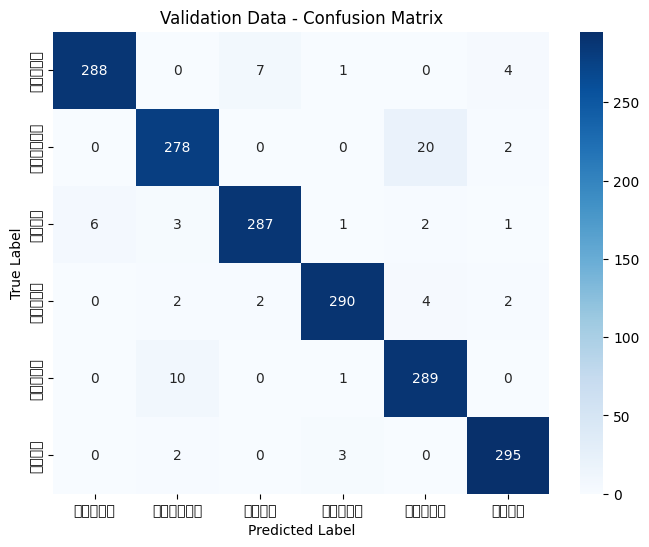

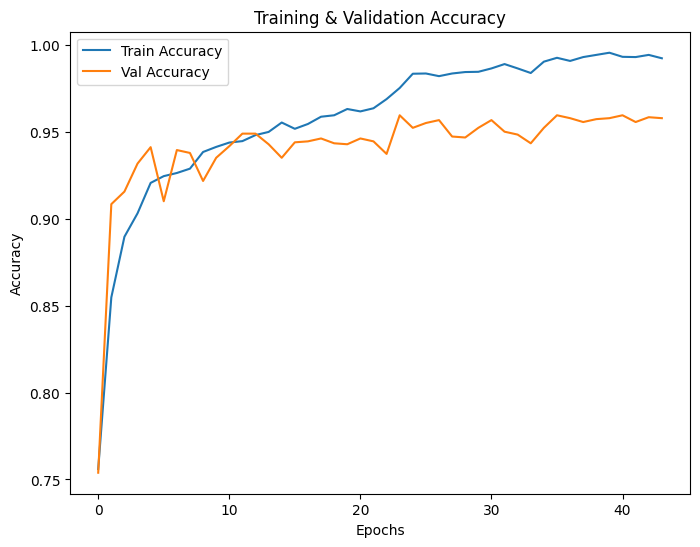


Validation 데이터 평가 결과:
 Accuracy: 0.9594

 Classification Report:
               precision    recall  f1-score   support

       이륜차경적       0.98      0.96      0.97       300
      이륜차주행음       0.94      0.93      0.93       300
        차량경적       0.97      0.96      0.96       300
       차량사이렌       0.98      0.97      0.97       300
       차량주행음       0.92      0.96      0.94       300
        기타소음       0.97      0.98      0.98       300

    accuracy                           0.96      1800
   macro avg       0.96      0.96      0.96      1800
weighted avg       0.96      0.96      0.96      1800

42/42 [==============================] - 0s 7ms/step


/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/utils.py:61: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.draw()
/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/utils.py:61: UserWarning: Glyph 47452 (\N{HANGUL SYLLABLE RYUN}) missing from current font.
  fig.canvas.draw()
/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/utils.py:61: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  fig.canvas.draw()
/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/utils.py:61: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  fig.canvas.draw()
/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/utils.py:61: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from current font.
  fig.canvas.draw()
/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/utils.py:61: User

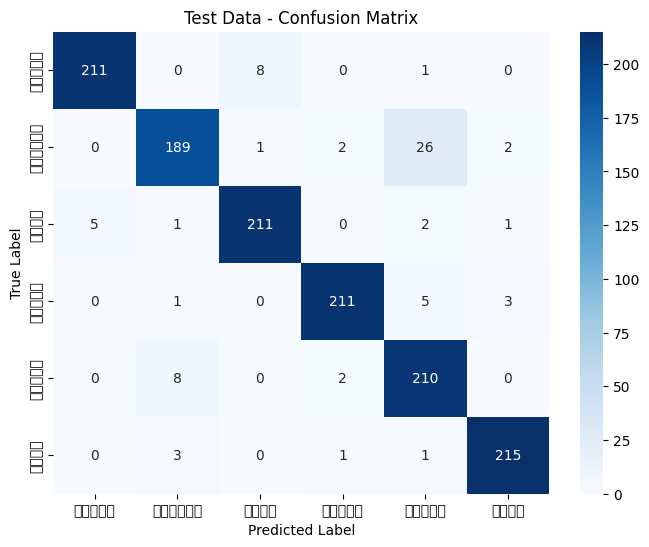

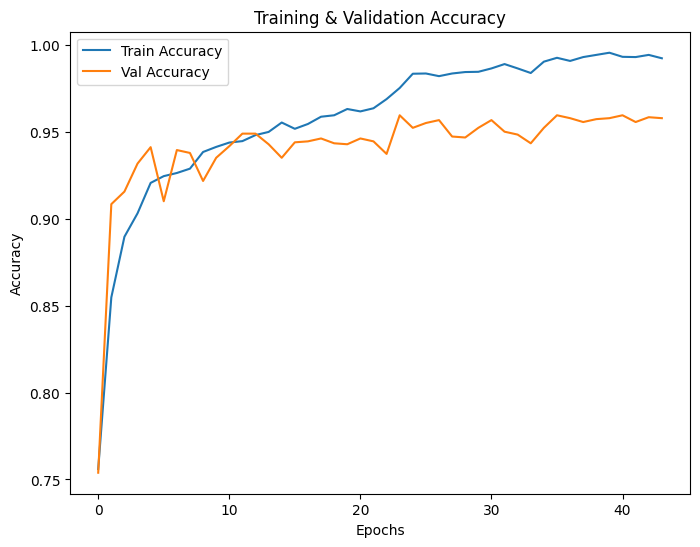


Test 데이터 평가 결과:
 Accuracy: 0.9447

 Classification Report:
               precision    recall  f1-score   support

       이륜차경적       0.98      0.96      0.97       220
      이륜차주행음       0.94      0.86      0.90       220
        차량경적       0.96      0.96      0.96       220
       차량사이렌       0.98      0.96      0.97       220
       차량주행음       0.86      0.95      0.90       220
        기타소음       0.97      0.98      0.98       220

    accuracy                           0.94      1320
   macro avg       0.95      0.94      0.94      1320
weighted avg       0.95      0.94      0.94      1320



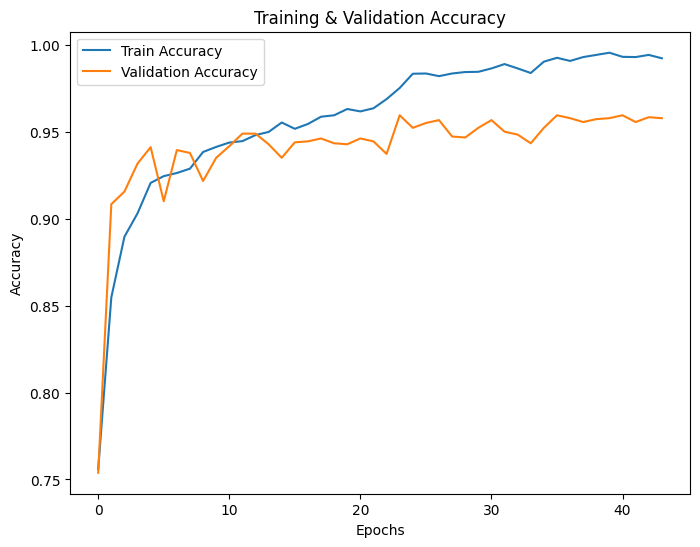

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Activation, Add, GlobalAveragePooling1D, Dense, Dropout, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils import class_weight

#############################################
# Part 0. 데이터 로드 및 전처리
#############################################
# 학습 데이터와 테스트 데이터 파일명 (파일 경로를 사용자 환경에 맞게 수정)
train_file = "final_training_data_sampled_1500_ood_label.csv"
test_file = "final_test_data_sampled_220_ood_label.csv"

train_df = pd.read_csv(train_file)
test_df  = pd.read_csv(test_file)

#############################################
# Part 1. 라벨 매핑 및 인코딩
#############################################
# 최종 6개 라벨: 교통 소음 5개와 "기타소음"
final_labels = ['이륜차경적', '이륜차주행음', '차량경적', '차량사이렌', '차량주행음', '기타소음']
label_to_code = {label: i for i, label in enumerate(final_labels)}
unknown_label_index = label_to_code['기타소음']
code_to_label = {v: k for k, v in label_to_code.items()}
print("최종 라벨 매핑:", label_to_code)

# 학습 데이터 : ood_label 컬럼을 사용 (파일 내 라벨은 ood_label)
if 'ood_label' in train_df.columns:
    train_df['encoded_label'] = train_df['ood_label'].map(lambda x: label_to_code.get(x, unknown_label_index))
else:
    raise ValueError("학습 데이터에 'ood_label' 컬럼이 없습니다.")
    
# 테스트 데이터 : 마찬가지로 ood_label 컬럼 사용
if 'ood_label' in test_df.columns:
    test_df['encoded_label'] = test_df['ood_label'].map(lambda x: label_to_code.get(x, unknown_label_index))
else:
    raise ValueError("테스트 데이터에 'ood_label' 컬럼이 없습니다.")

print("학습 데이터 유니크 라벨:", np.unique(train_df['ood_label']))
print("테스트 데이터 유니크 라벨:", np.unique(test_df['ood_label']))

y_train = train_df['encoded_label'].values
y_test = test_df['encoded_label'].values

#############################################
# Part 2. 입력 데이터 준비 (MFCC 특징)
#############################################
# MFCC 특징 컬럼: mfcc_1 ~ mfcc_50
mfcc_columns = [f'mfcc_{i}' for i in range(1, 51)]

# 학습 데이터
X_train = train_df[mfcc_columns].values
# 테스트 데이터
X_test = test_df[mfcc_columns].values

# Reshape : (samples, 50) -> (samples, 50, 1)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test  = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

#############################################
# Part 3. Train/Validation Split & One-hot Encoding
#############################################
# 여기서는 train_df는 최종 학습 데이터로, 이미 균형 잡힌 상태로 샘플링되어 있다고 가정
y_train_cat = to_categorical(y_train, num_classes=len(final_labels))
y_test_cat  = to_categorical(y_test, num_classes=len(final_labels))

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train_cat, test_size=0.20, random_state=42, stratify=y_train
)

#############################################
# Part 4. 모델 정의: 수정된 ResNet 모델 (출력 유닛 6개)
#############################################
def residual_block(x, filters, kernel_size=3, stride=1, use_dropout=False):
    shortcut = x
    x = Conv1D(filters, kernel_size, strides=stride, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    if use_dropout:
        x = Dropout(0.2)(x)
    x = Conv1D(filters, kernel_size, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    if shortcut.shape[-1] != filters:
        shortcut = Conv1D(filters, 1, strides=stride, padding='same')(shortcut)
    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

def build_resnet(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Conv1D(64, 7, strides=2, padding='same', activation='relu')(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling1D(3, strides=2, padding='same')(x)
    x = residual_block(x, 64, use_dropout=True)
    x = residual_block(x, 128, stride=2, use_dropout=True)
    x = residual_block(x, 256, stride=2, use_dropout=True)
    x = residual_block(x, 512, stride=2, use_dropout=True)
    x = GlobalAveragePooling1D()(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    return Model(inputs, outputs)

num_classes = len(final_labels)  # 6
resnet_model_modified = build_resnet((50, 1), num_classes)
resnet_model_modified.compile(optimizer=Adam(learning_rate=0.001), 
                              loss='categorical_crossentropy', metrics=['accuracy'])
resnet_model_modified.summary()

#############################################
# Part 5. 클래스 가중치 계산
#############################################
cw = class_weight.compute_class_weight('balanced', classes=np.unique(np.argmax(y_train_split, axis=1)), 
                                         y=np.argmax(y_train_split, axis=1))
cw_dict = dict(enumerate(cw))
print("클래스 가중치:", cw_dict)

#############################################
# Part 6. 모델 학습
#############################################
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-5)

history = resnet_model_modified.fit(
    X_train_split, y_train_split,
    epochs=150, batch_size=32,
    validation_data=(X_val_split, y_val_split),
    callbacks=[early_stopping, reduce_lr],
    class_weight=cw_dict,
    verbose=1
)
resnet_model_modified.save("resnet_model_modified.h5")
print("모델이 resnet_model_modified.h5 파일로 저장되었습니다.")

#############################################
# Part 7. 평가 함수 정의 및 정확도 추세 그래프 그리기
#############################################
def evaluate_and_plot(model, X, y_true, dataset_name="Validation", history=None):
    y_pred_probs = model.predict(X)
    y_pred = np.argmax(y_pred_probs, axis=1)
    
    # 만약 y_true가 one-hot encoding 되어 있으면 변환
    if len(y_true.shape) > 1 and y_true.shape[1] > 1:
        y_true = np.argmax(y_true, axis=1)
    
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                xticklabels=final_labels, yticklabels=final_labels)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"{dataset_name} Data - Confusion Matrix")
    plt.show()
    
    if history is not None:
        plt.figure(figsize=(8,6))
        plt.plot(history.history['accuracy'], label='Train Accuracy')
        plt.plot(history.history['val_accuracy'], label='Val Accuracy')
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.title("Training & Validation Accuracy")
        plt.legend()
        plt.show()
    
    print(f"\n{dataset_name} 데이터 평가 결과:")
    print(f" Accuracy: {acc:.4f}")
    print("\n Classification Report:\n", classification_report(y_true, y_pred, target_names=final_labels))
    return acc

# 평가: Validation 데이터에 대해
val_acc = evaluate_and_plot(resnet_model_modified, X_val_split, y_val_split, dataset_name="Validation", history=history)

# 테스트 데이터는 one-hot encoding 형태가 아니라 정수형이라면 직접 변환
y_test_cat = to_categorical(y_test, num_classes=len(final_labels))
test_acc = evaluate_and_plot(resnet_model_modified, X_test, y_test_cat, dataset_name="Test", history=history)

# 정확도 추세 비교 (Validation vs Test)
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Training & Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

## 5. 5차 성능개선

Train unique labels: ['기타소음' '이륜차경적' '이륜차주행음' '차량경적' '차량사이렌' '차량주행음']
Test unique labels: ['기타소음' '이륜차경적' '이륜차주행음' '차량경적' '차량사이렌' '차량주행음']
X_train shape: (9000, 50, 1)
X_test shape: (1320, 50, 1)
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 50, 1)]              0         []                            
                                                                                                  
 conv1d_12 (Conv1D)          (None, 25, 64)               512       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_9 (Bat  (None, 25, 64)               256       ['conv1d_12[0][0]']           
 chNormalization)                                                                             

/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


57/57 [==============================] - 1s 7ms/step


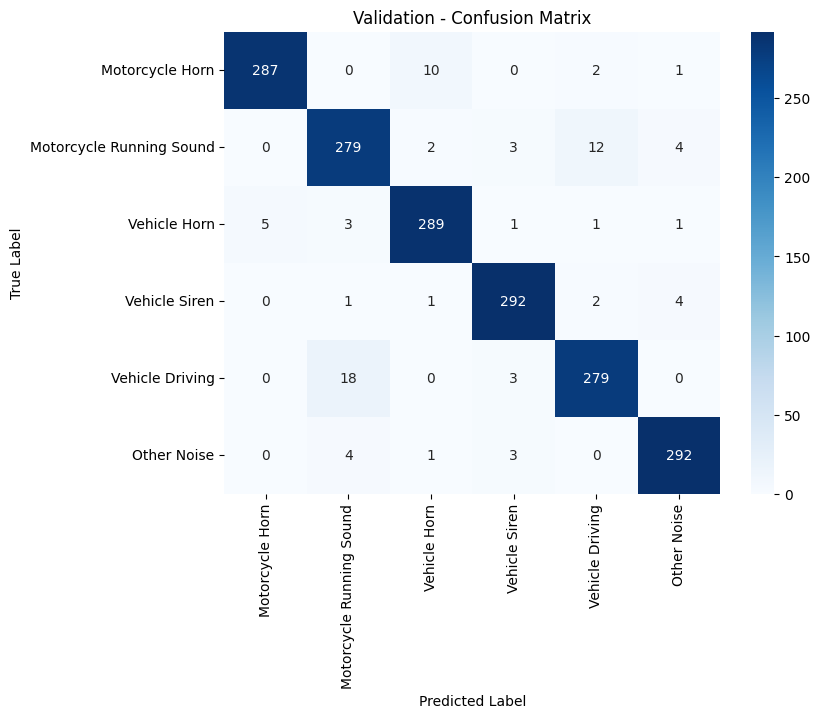

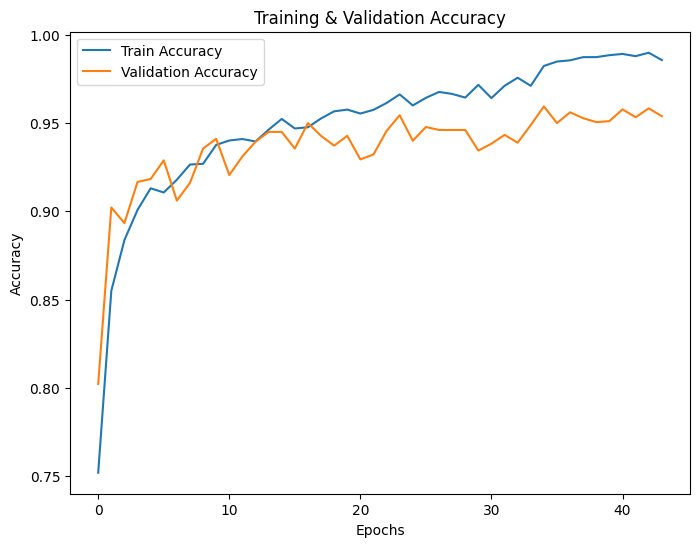


Validation Evaluation:
 Accuracy: 0.9544

Classification Report:
                           precision    recall  f1-score   support

         Motorcycle Horn       0.98      0.96      0.97       300
Motorcycle Running Sound       0.91      0.93      0.92       300
            Vehicle Horn       0.95      0.96      0.96       300
           Vehicle Siren       0.97      0.97      0.97       300
         Vehicle Driving       0.94      0.93      0.94       300
             Other Noise       0.97      0.97      0.97       300

                accuracy                           0.95      1800
               macro avg       0.95      0.95      0.95      1800
            weighted avg       0.95      0.95      0.95      1800

42/42 [==============================] - 0s 7ms/step


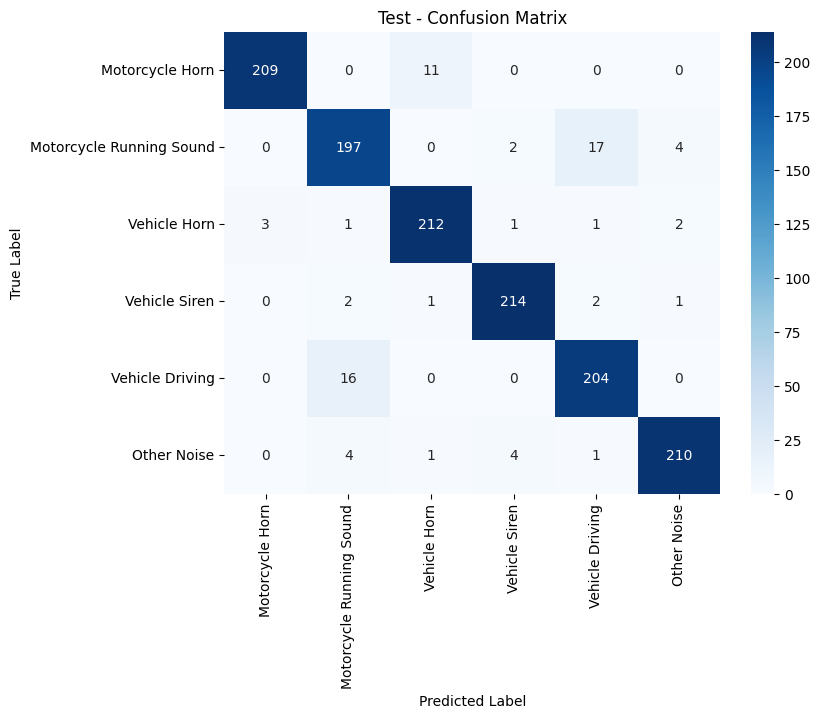

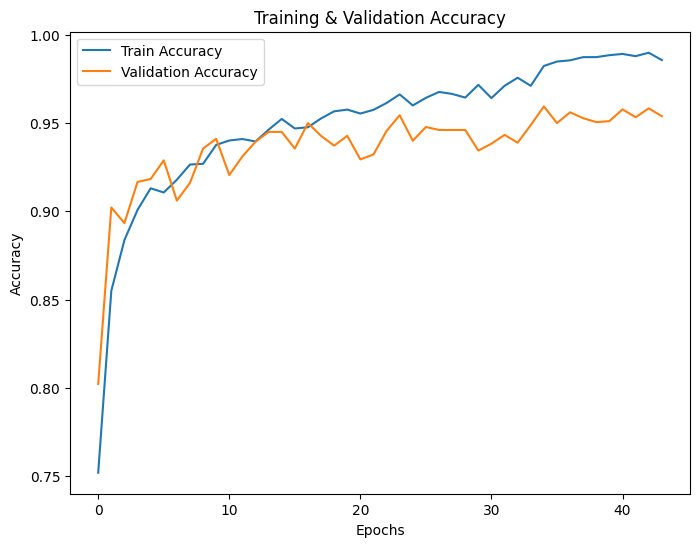


Test Evaluation:
 Accuracy: 0.9439

Classification Report:
                           precision    recall  f1-score   support

         Motorcycle Horn       0.99      0.95      0.97       220
Motorcycle Running Sound       0.90      0.90      0.90       220
            Vehicle Horn       0.94      0.96      0.95       220
           Vehicle Siren       0.97      0.97      0.97       220
         Vehicle Driving       0.91      0.93      0.92       220
             Other Noise       0.97      0.95      0.96       220

                accuracy                           0.94      1320
               macro avg       0.94      0.94      0.94      1320
            weighted avg       0.94      0.94      0.94      1320



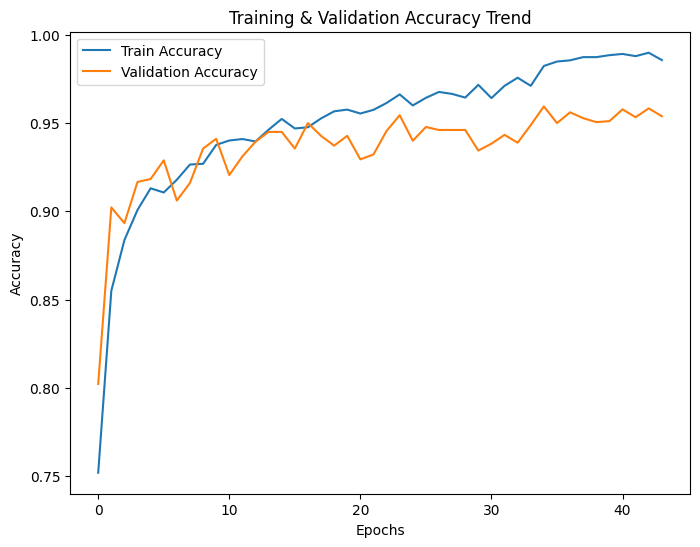

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Activation, Add, GlobalAveragePooling1D, Dense, Dropout, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils import class_weight

#############################################
# Part 0. 데이터 로드 및 전처리
#############################################
train_file = "final_training_data_sampled_1500_ood_label.csv"
test_file  = "final_test_data_sampled_220_ood_label.csv"

train_df = pd.read_csv(train_file)
test_df  = pd.read_csv(test_file)

#############################################
# Part 1. 라벨 매핑 및 인코딩
#############################################
# 최종 6개 라벨: 교통 소음 5개와 기타 소음
final_labels = ['이륜차경적', '이륜차주행음', '차량경적', '차량사이렌', '차량주행음', '기타소음']
# 영어 라벨도 함께 정의 (순서를 맞춤)
english_labels = ['Motorcycle Horn', 'Motorcycle Running Sound', 'Vehicle Horn', 'Vehicle Siren', 'Vehicle Driving', 'Other Noise']

label_to_code = {label: i for i, label in enumerate(final_labels)}
unknown_label_index = label_to_code['기타소음']

# 학습 데이터: 라벨 컬럼은 "ood_label" (이미 전처리되어 있음)
if 'ood_label' in train_df.columns:
    train_df['encoded_label'] = train_df['ood_label'].map(lambda x: label_to_code.get(x, unknown_label_index))
else:
    raise ValueError("학습 데이터에 'ood_label' 컬럼이 없습니다.")

# 테스트 데이터: 라벨 컬럼은 "ood_label"
if 'ood_label' in test_df.columns:
    test_df['encoded_label'] = test_df['ood_label'].map(lambda x: label_to_code.get(x, unknown_label_index))
else:
    raise ValueError("테스트 데이터에 'ood_label' 컬럼이 없습니다.")

print("Train unique labels:", np.unique(train_df['ood_label']))
print("Test unique labels:", np.unique(test_df['ood_label']))

y_train = train_df['encoded_label'].values
y_test  = test_df['encoded_label'].values

#############################################
# Part 2. 입력 데이터 준비 (MFCC 특징)
#############################################
mfcc_columns = [f'mfcc_{i}' for i in range(1, 51)]
X_train = train_df[mfcc_columns].values
X_test = test_df[mfcc_columns].values

# Reshape: (samples, 50) -> (samples, 50, 1)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

#############################################
# Part 3. Train/Val Split & One-hot encoding
#############################################
y_train_cat = to_categorical(y_train, num_classes=len(final_labels))
y_test_cat  = to_categorical(y_test, num_classes=len(final_labels))

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train_cat, test_size=0.20, random_state=42, stratify=y_train
)

#############################################
# Part 4. 모델 정의: 수정된 ResNet + 추가 Dense Layer for Vehicle Driving 개선
#############################################
def residual_block(x, filters, kernel_size=3, stride=1, use_dropout=False):
    shortcut = x
    x = Conv1D(filters, kernel_size, strides=stride, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    if use_dropout:
        x = Dropout(0.2)(x)
    x = Conv1D(filters, kernel_size, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    if shortcut.shape[-1] != filters:
        shortcut = Conv1D(filters, 1, strides=stride, padding='same')(shortcut)
    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

def build_resnet(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Conv1D(64, 7, strides=2, padding='same', activation='relu')(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling1D(pool_size=3, strides=2, padding='same')(x)
    x = residual_block(x, 64, use_dropout=True)
    x = residual_block(x, 128, stride=2, use_dropout=True)
    x = residual_block(x, 256, stride=2, use_dropout=True)
    x = residual_block(x, 512, stride=2, use_dropout=True)
    x = GlobalAveragePooling1D()(x)
    # 추가 Dense Layer: 차량주행음의 구분력을 높이기 위해 FC 레이어 추가
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    return Model(inputs, outputs)

num_classes = len(final_labels)   # 6개
resnet_model_modified = build_resnet((50, 1), num_classes)
optimizer = Adam(learning_rate=0.001)
resnet_model_modified.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
resnet_model_modified.summary()

#############################################
# Part 5. 클래스 가중치 계산
#############################################
cw = class_weight.compute_class_weight('balanced', classes=np.unique(np.argmax(y_train_split, axis=1)),
                                         y=np.argmax(y_train_split, axis=1))
cw_dict = dict(enumerate(cw))
print("클래스 가중치:", cw_dict)

#############################################
# Part 6. 모델 학습
#############################################
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-5)

history = resnet_model_modified.fit(X_train_split, y_train_split, epochs=150, batch_size=32,
                                      validation_data=(X_val_split, y_val_split),
                                      callbacks=[early_stopping, reduce_lr],
                                      class_weight=cw_dict,
                                      verbose=1)
resnet_model_modified.save("resnet_model_modified.h5")
print("모델이 resnet_model_modified.h5 파일로 저장되었습니다.")

#############################################
# Part 7. 평가 함수 정의 및 적용 (영어 라벨로)
#############################################
def evaluate_and_plot(model, X, y_true, dataset_name="Dataset", history=None):
    y_pred_probs = model.predict(X)
    y_pred = np.argmax(y_pred_probs, axis=1)
    
    if len(y_true.shape) > 1 and y_true.shape[1] > 1:
        y_true = np.argmax(y_true, axis=1)
    
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                xticklabels=english_labels, yticklabels=english_labels)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"{dataset_name} - Confusion Matrix")
    plt.show()
    
    if history is not None:
        plt.figure(figsize=(8,6))
        plt.plot(history.history['accuracy'], label='Train Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.title("Training & Validation Accuracy")
        plt.legend()
        plt.show()
    
    print(f"\n{dataset_name} Evaluation:")
    print(f" Accuracy: {acc:.4f}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=english_labels))
    return acc

# 평가: Validation 데이터
val_acc = evaluate_and_plot(resnet_model_modified, X_val_split, y_val_split, dataset_name="Validation", history=history)

# 평가: Test 데이터
y_test_cat = to_categorical(y_test, num_classes=len(final_labels))
test_acc = evaluate_and_plot(resnet_model_modified, X_test, y_test_cat, dataset_name="Test", history=history)

#############################################
# Part 8. 정확도 추세 그래프 (Train vs Validation)
#############################################
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training & Validation Accuracy Trend")
plt.legend()
plt.show()

## 6. 6차 성능개선

Train unique labels: ['기타소음' '이륜차경적' '이륜차주행음' '차량경적' '차량사이렌' '차량주행음']
Test unique labels: ['기타소음' '이륜차경적' '이륜차주행음' '차량경적' '차량사이렌' '차량주행음']
X_train shape: (9000, 50, 1)
X_test shape: (1320, 50, 1)
Augmented X_train shape: (15000, 50, 1)
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 50, 1)]              0         []                            
                                                                                                  
 conv1d_24 (Conv1D)          (None, 25, 64)               512       ['input_3[0][0]']             
                                                                                                  
 batch_normalization_18 (Ba  (None, 25, 64)               256       ['conv1d_24[0][0]']           
 tchNormalization)                                    

/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


94/94 [==============================] - 1s 7ms/step


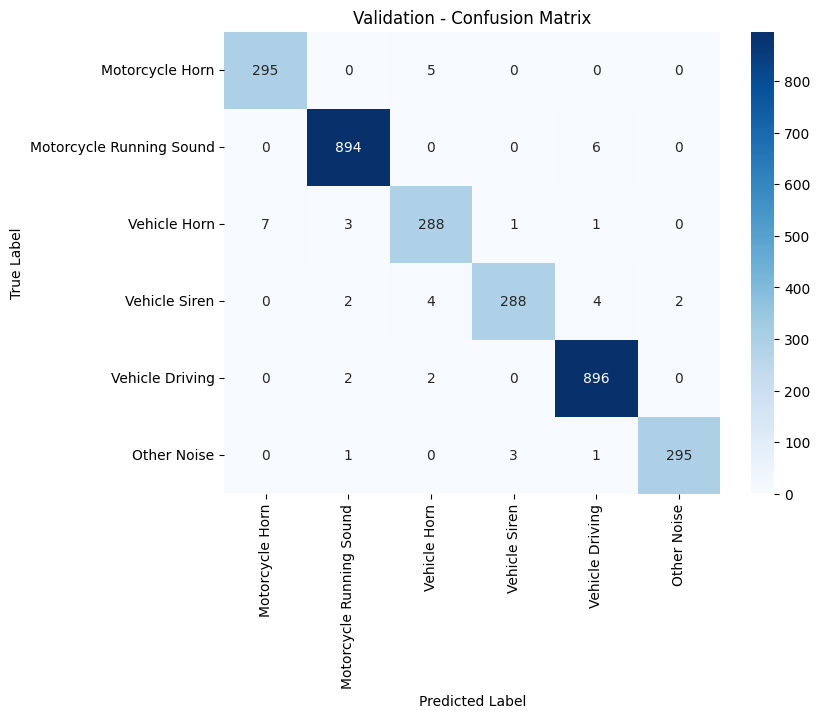

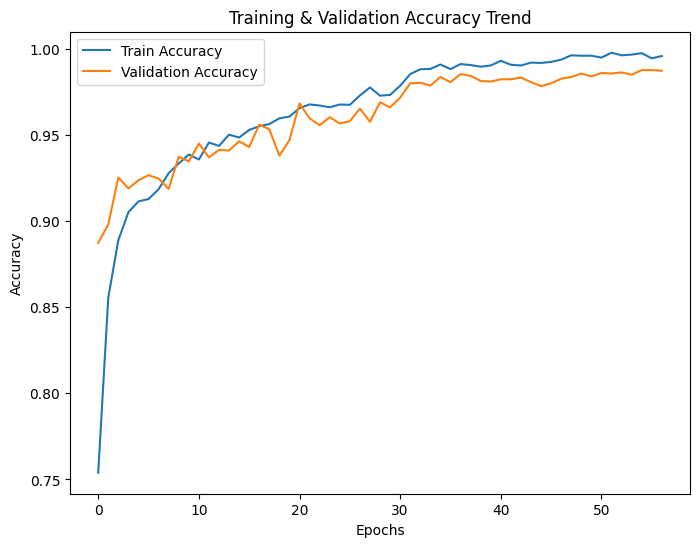


Validation Evaluation:
 Accuracy: 0.9853

Classification Report:
                           precision    recall  f1-score   support

         Motorcycle Horn       0.98      0.98      0.98       300
Motorcycle Running Sound       0.99      0.99      0.99       900
            Vehicle Horn       0.96      0.96      0.96       300
           Vehicle Siren       0.99      0.96      0.97       300
         Vehicle Driving       0.99      1.00      0.99       900
             Other Noise       0.99      0.98      0.99       300

                accuracy                           0.99      3000
               macro avg       0.98      0.98      0.98      3000
            weighted avg       0.99      0.99      0.99      3000

42/42 [==============================] - 0s 7ms/step


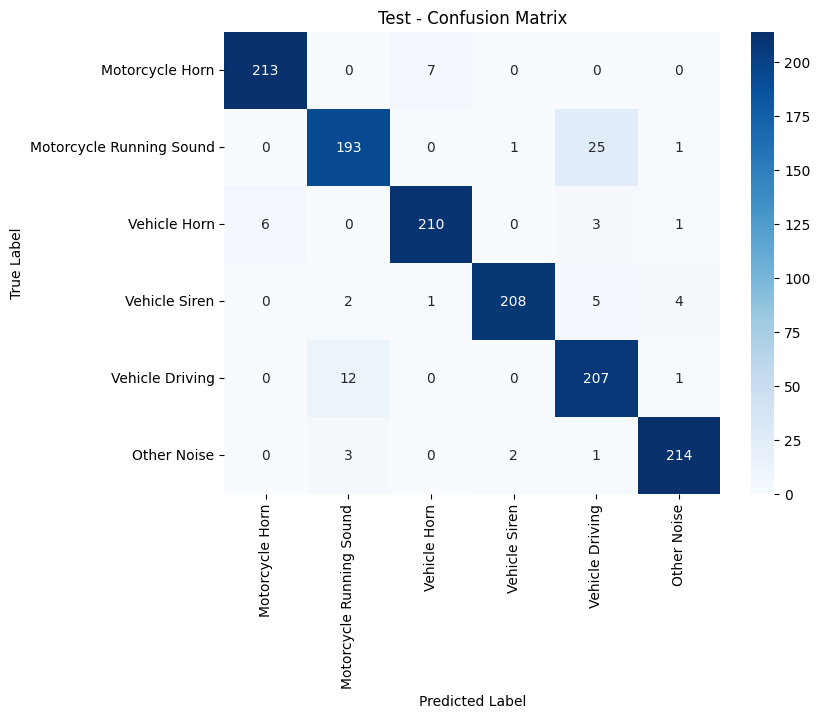

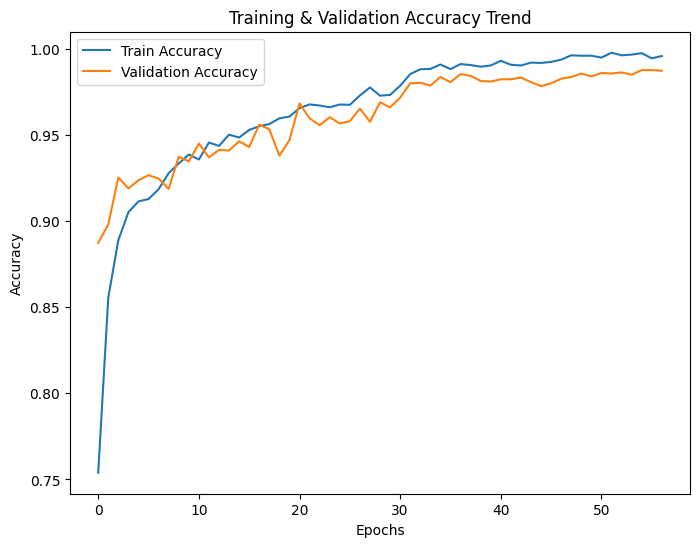


Test Evaluation:
 Accuracy: 0.9432

Classification Report:
                           precision    recall  f1-score   support

         Motorcycle Horn       0.97      0.97      0.97       220
Motorcycle Running Sound       0.92      0.88      0.90       220
            Vehicle Horn       0.96      0.95      0.96       220
           Vehicle Siren       0.99      0.95      0.97       220
         Vehicle Driving       0.86      0.94      0.90       220
             Other Noise       0.97      0.97      0.97       220

                accuracy                           0.94      1320
               macro avg       0.94      0.94      0.94      1320
            weighted avg       0.94      0.94      0.94      1320



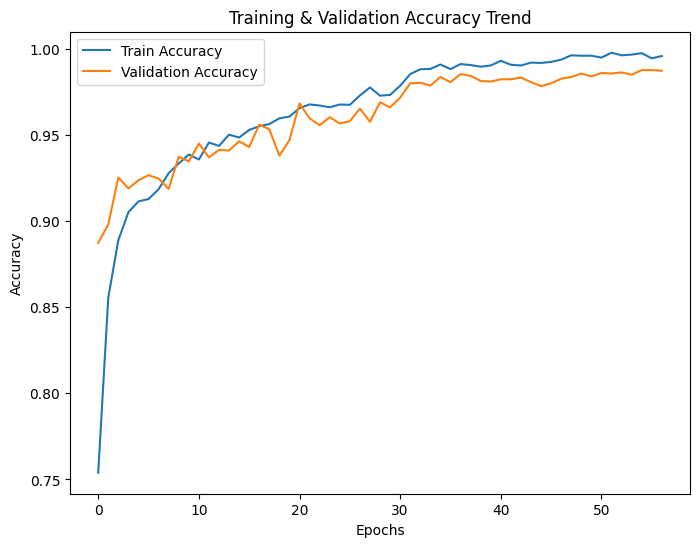

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Activation, Add, GlobalAveragePooling1D, Dense, Dropout, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils import class_weight

#############################################
# Part 0. 데이터 로드 및 전처리
#############################################
# 학습 데이터와 테스트 데이터 파일명 (사용자 환경에 맞게 수정)
train_file = "final_training_data_sampled_1500_ood_label.csv"
test_file  = "final_test_data_sampled_220_ood_label.csv"

train_df = pd.read_csv(train_file)
test_df  = pd.read_csv(test_file)

#############################################
# Part 1. 라벨 매핑 및 인코딩
#############################################
# 최종 6개 라벨 : 교통 소음 5개 + 기타소음
final_labels = ['이륜차경적', '이륜차주행음', '차량경적', '차량사이렌', '차량주행음', '기타소음']
# 영어 라벨: 혼동행렬에 영어로 표시하기 위해
english_labels = ['Motorcycle Horn', 'Motorcycle Running Sound', 'Vehicle Horn', 'Vehicle Siren', 'Vehicle Driving', 'Other Noise']

# 우선, ood_label 컬럼을 사용하여 최종 라벨로 매핑 (학습 데이터와 테스트 데이터 모두)
label_to_code = {label: i for i, label in enumerate(final_labels)}
unknown_label_index = label_to_code['기타소음']

if 'ood_label' in train_df.columns:
    train_df['encoded_label'] = train_df['ood_label'].map(lambda x: label_to_code.get(x, unknown_label_index))
else:
    raise ValueError("학습 데이터에 'ood_label' 컬럼이 없습니다.")

if 'ood_label' in test_df.columns:
    test_df['encoded_label'] = test_df['ood_label'].map(lambda x: label_to_code.get(x, unknown_label_index))
else:
    raise ValueError("테스트 데이터에 'ood_label' 컬럼이 없습니다.")

print("Train unique labels:", np.unique(train_df['ood_label']))
print("Test unique labels:", np.unique(test_df['ood_label']))

y_train = train_df['encoded_label'].values  # 정수형 라벨
y_test = test_df['encoded_label'].values

#############################################
# Part 2. 입력 데이터 준비 (MFCC 특징)
#############################################
# mfcc_1 ~ mfcc_50 컬럼 사용
mfcc_columns = [f'mfcc_{i}' for i in range(1, 51)]
X_train = train_df[mfcc_columns].values
X_test  = test_df[mfcc_columns].values

# Reshape: (samples, 50) -> (samples, 50, 1)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test  = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

#############################################
# Part 3. 데이터 증강 (특히 오토바이 주행음(1) & 차량 주행음(4))
#############################################
# MFCC 특징에 간단한 노이즈를 추가하여 증강하는 함수 정의
def augment_mfcc(mfcc, noise_level=0.02):
    noise = np.random.normal(0, noise_level, mfcc.shape)
    return mfcc + noise

X_train_aug = []
y_train_aug = []

for i in range(len(X_train)):
    sample = X_train[i]
    lbl = y_train[i]
    # 원본 샘플 추가
    X_train_aug.append(sample)
    y_train_aug.append(lbl)
    # 만약 클래스가 오토바이 주행음(1) 또는 차량 주행음(4)인 경우, 추가 증강 수행
    if lbl in [1, 4]:
        # 예: 2회 증강 (수치는 실험으로 조정)
        for _ in range(2):
            aug_sample = augment_mfcc(sample, noise_level=0.02)
            X_train_aug.append(aug_sample)
            y_train_aug.append(lbl)
            
X_train_aug = np.array(X_train_aug)
y_train_aug = np.array(y_train_aug)
print("Augmented X_train shape:", X_train_aug.shape)

#############################################
# Part 4. Train/Validation Split & One-hot Encoding
#############################################
y_train_cat = to_categorical(y_train_aug, num_classes=len(final_labels))
y_test_cat  = to_categorical(y_test, num_classes=len(final_labels))

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_aug, y_train_cat, test_size=0.20, random_state=42, stratify=y_train_aug
)

#############################################
# Part 5. 모델 정의: 수정된 ResNet 모델 (출력 유닛 6개)
#############################################
def residual_block(x, filters, kernel_size=3, stride=1, use_dropout=False):
    shortcut = x
    x = Conv1D(filters, kernel_size, strides=stride, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    if use_dropout:
        x = Dropout(0.2)(x)
    x = Conv1D(filters, kernel_size, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    if shortcut.shape[-1] != filters:
        shortcut = Conv1D(filters, 1, strides=stride, padding='same')(shortcut)
    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

def build_resnet(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Conv1D(64, 7, strides=2, padding='same', activation='relu')(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling1D(pool_size=3, strides=2, padding='same')(x)
    x = residual_block(x, 64, use_dropout=True)
    x = residual_block(x, 128, stride=2, use_dropout=True)
    x = residual_block(x, 256, stride=2, use_dropout=True)
    x = residual_block(x, 512, stride=2, use_dropout=True)
    x = GlobalAveragePooling1D()(x)
    # 추가 Dense layer for 차량 주행음 구분력 개선 (필요시)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    return Model(inputs, outputs)

num_classes = len(final_labels)  # 6
resnet_model_modified = build_resnet((50, 1), num_classes)
optimizer = Adam(learning_rate=0.001)
resnet_model_modified.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
resnet_model_modified.summary()

#############################################
# Part 6. 클래스 가중치 계산
#############################################
cw = class_weight.compute_class_weight('balanced', classes=np.unique(np.argmax(y_train_split, axis=1)), 
                                         y=np.argmax(y_train_split, axis=1))
cw_dict = dict(enumerate(cw))
print("클래스 가중치:", cw_dict)

#############################################
# Part 7. 모델 학습
#############################################
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-5)

history = resnet_model_modified.fit(
    X_train_split, y_train_split,
    epochs=150, batch_size=32,
    validation_data=(X_val_split, y_val_split),
    callbacks=[early_stopping, reduce_lr],
    class_weight=cw_dict,
    verbose=1
)

# 저장 (다른 이름으로 저장하여 덮어쓰지 않음)
resnet_model_modified.save("resnet_model_modified_v2.h5")
print("모델이 resnet_model_modified_v2.h5 파일로 저장되었습니다.")

#############################################
# Part 8. 평가 함수 정의 및 적용 (영어 라벨 표시, 그리고 정확도 추세 그래프는 한 번만 출력)
#############################################
def evaluate_and_plot(model, X, y_true, dataset_name="Dataset", history=None):
    y_pred_probs = model.predict(X)
    y_pred = np.argmax(y_pred_probs, axis=1)
    
    if len(y_true.shape) > 1 and y_true.shape[1] > 1:
        y_true = np.argmax(y_true, axis=1)
    
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    
    # 혼동행렬을 영어 라벨로 표시
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                xticklabels=english_labels, yticklabels=english_labels)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"{dataset_name} - Confusion Matrix")
    plt.show()
    
    if history is not None:
        plt.figure(figsize=(8,6))
        plt.plot(history.history['accuracy'], label='Train Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.title("Training & Validation Accuracy Trend")
        plt.legend()
        plt.show()
    
    print(f"\n{dataset_name} Evaluation:")
    print(f" Accuracy: {acc:.4f}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=english_labels))
    return acc

# 영어 라벨 정의 (Part 1에서 설정한 영어 라벨 순서)
english_labels = ['Motorcycle Horn', 'Motorcycle Running Sound', 'Vehicle Horn', 'Vehicle Siren', 'Vehicle Driving', 'Other Noise']

# 평가: Validation 데이터 평가
val_acc = evaluate_and_plot(resnet_model_modified, X_val_split, y_val_split, dataset_name="Validation", history=history)

# 평가: Test 데이터 평가
y_test_cat = to_categorical(y_test, num_classes=len(final_labels))
test_acc = evaluate_and_plot(resnet_model_modified, X_test, y_test_cat, dataset_name="Test", history=history)

#############################################
# Part 9. 정확도 추세 그래프 (Train vs Validation, 한 번만 출력)
#############################################
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training & Validation Accuracy Trend")
plt.legend()
plt.show()

## 7. 7차 성능개선

Train unique labels: ['기타소음' '이륜차경적' '이륜차주행음' '차량경적' '차량사이렌' '차량주행음']
Test unique labels: ['기타소음' '이륜차경적' '이륜차주행음' '차량경적' '차량사이렌' '차량주행음']
X_train shape: (9000, 50, 1)
X_test shape: (1320, 50, 1)
Augmented X_train shape: (15000, 50, 1)
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 50, 1)]              0         []                            
                                                                                                  
 conv1d_24 (Conv1D)          (None, 25, 64)               512       ['input_3[0][0]']             
                                                                                                  
 batch_normalization_18 (Ba  (None, 25, 64)               256       ['conv1d_24[0][0]']           
 tchNormalization)                                    

/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


94/94 [==============================] - 1s 7ms/step


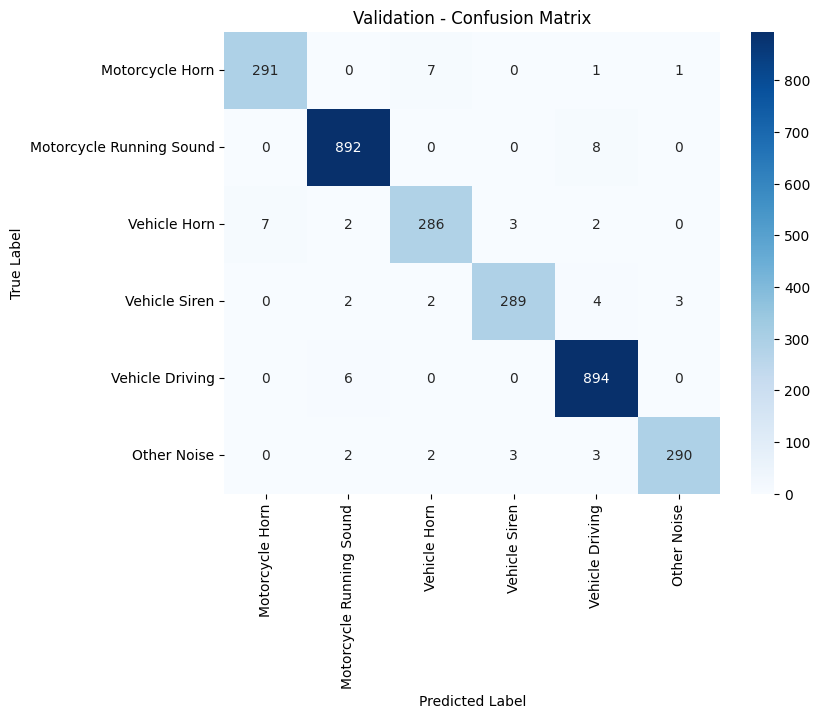

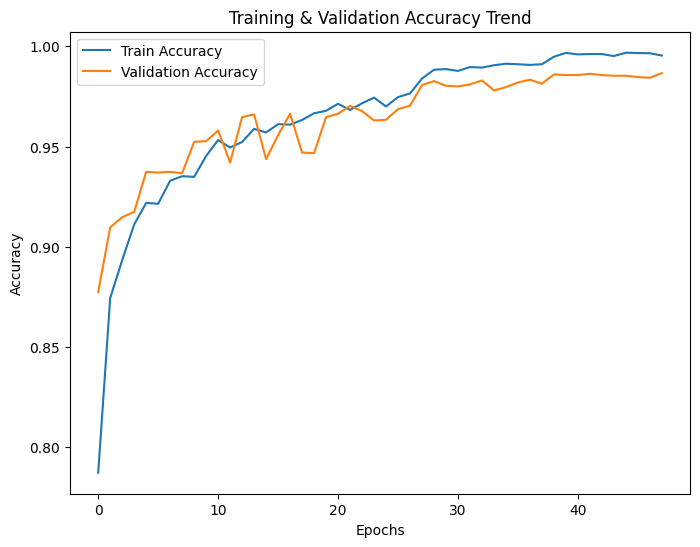


Validation Evaluation:
 Accuracy: 0.9807

Classification Report:
                           precision    recall  f1-score   support

         Motorcycle Horn       0.98      0.97      0.97       300
Motorcycle Running Sound       0.99      0.99      0.99       900
            Vehicle Horn       0.96      0.95      0.96       300
           Vehicle Siren       0.98      0.96      0.97       300
         Vehicle Driving       0.98      0.99      0.99       900
             Other Noise       0.99      0.97      0.98       300

                accuracy                           0.98      3000
               macro avg       0.98      0.97      0.98      3000
            weighted avg       0.98      0.98      0.98      3000

42/42 [==============================] - 0s 7ms/step


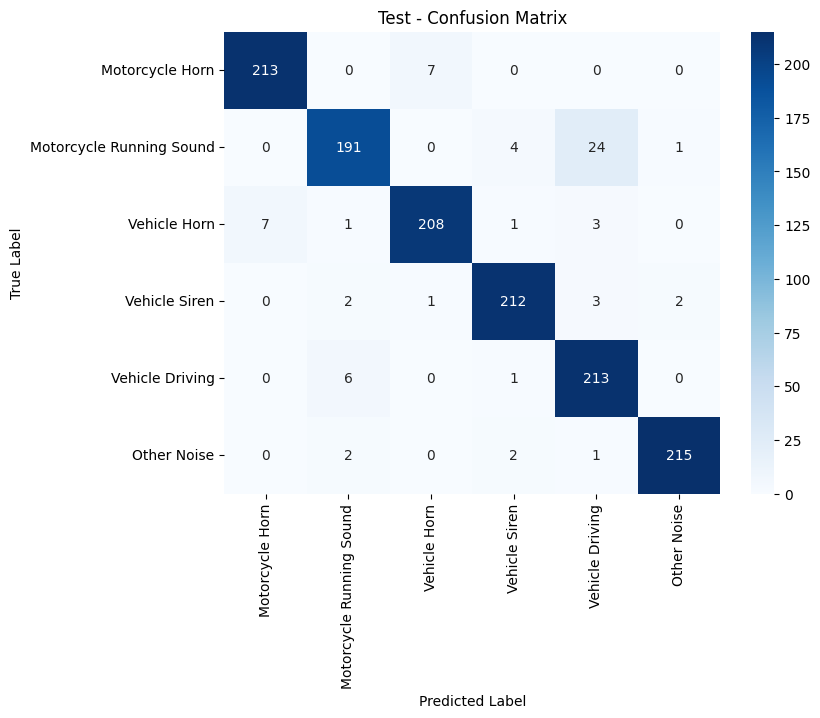

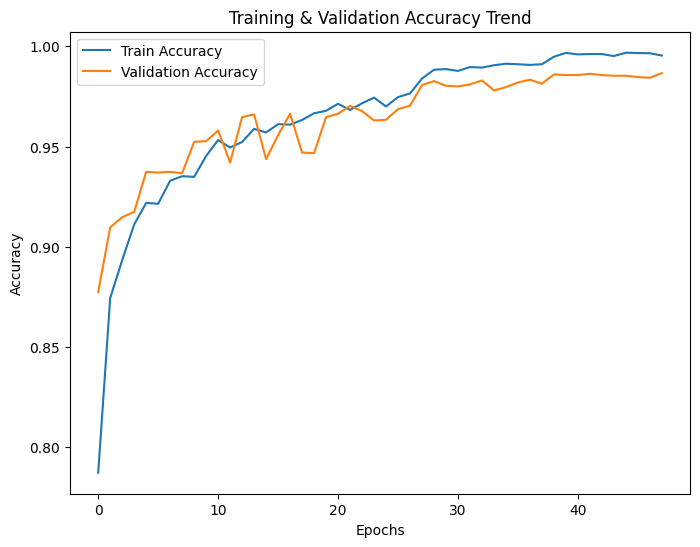


Test Evaluation:
 Accuracy: 0.9485

Classification Report:
                           precision    recall  f1-score   support

         Motorcycle Horn       0.97      0.97      0.97       220
Motorcycle Running Sound       0.95      0.87      0.91       220
            Vehicle Horn       0.96      0.95      0.95       220
           Vehicle Siren       0.96      0.96      0.96       220
         Vehicle Driving       0.87      0.97      0.92       220
             Other Noise       0.99      0.98      0.98       220

                accuracy                           0.95      1320
               macro avg       0.95      0.95      0.95      1320
            weighted avg       0.95      0.95      0.95      1320



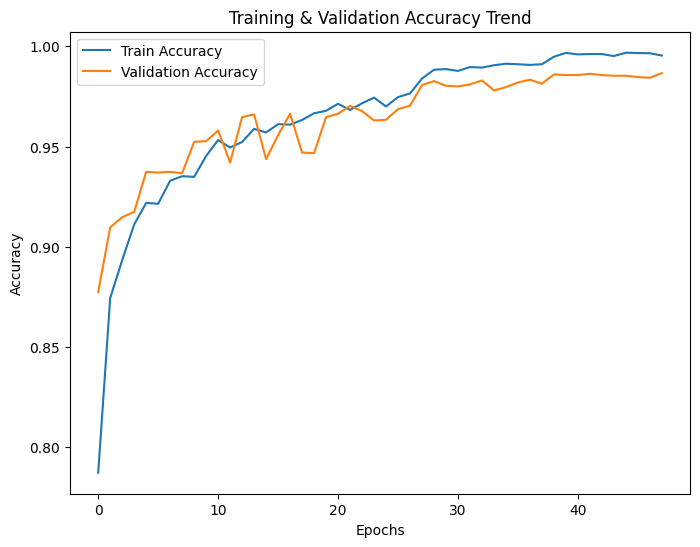


--- Sample Predictions ---
1/1 [==============================] - 0s 17ms/step
Sample 0: True = 기타소음, Predicted = 기타소음, Confidence = 0.9979
1/1 [==============================] - 0s 17ms/step
Sample 1: True = 기타소음, Predicted = 기타소음, Confidence = 1.0000
1/1 [==============================] - 0s 17ms/step
Sample 2: True = 기타소음, Predicted = 기타소음, Confidence = 0.9999
1/1 [==============================] - 0s 17ms/step
Sample 3: True = 기타소음, Predicted = 기타소음, Confidence = 1.0000
1/1 [==============================] - 0s 18ms/step
Sample 4: True = 기타소음, Predicted = 기타소음, Confidence = 1.0000
1/1 [==============================] - 0s 17ms/step
Sample 5: True = 기타소음, Predicted = 기타소음, Confidence = 1.0000
1/1 [==============================] - 0s 17ms/step
Sample 6: True = 기타소음, Predicted = 기타소음, Confidence = 1.0000
1/1 [==============================] - 0s 17ms/step
Sample 7: True = 기타소음, Predicted = 기타소음, Confidence = 0.9999
1/1 [==============================] - 0s 18ms/step
Sample 8: True =

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Activation, Add, GlobalAveragePooling1D, Dense, Dropout, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.utils import class_weight

#############################################
# Part 0. 데이터 로드 및 전처리
#############################################
train_file = "final_training_data_sampled_1500_ood_label.csv"
test_file  = "final_test_data_sampled_220_ood_label.csv"

train_df = pd.read_csv(train_file)
test_df  = pd.read_csv(test_file)

#############################################
# Part 1. 라벨 매핑 및 인코딩
#############################################
# 최종 6개 라벨 : 
# 교통 소음 5개: '이륜차경적', '이륜차주행음', '차량경적', '차량사이렌', '차량주행음'
# 기타소음: '기타소음'
final_labels = ['이륜차경적', '이륜차주행음', '차량경적', '차량사이렌', '차량주행음', '기타소음']
# 영어 라벨
english_labels = ['Motorcycle Horn', 'Motorcycle Running Sound', 'Vehicle Horn', 'Vehicle Siren', 'Vehicle Driving', 'Other Noise']

label_to_code = {label: i for i, label in enumerate(final_labels)}
unknown_label_index = label_to_code['기타소음']

if 'ood_label' in train_df.columns:
    train_df['encoded_label'] = train_df['ood_label'].map(lambda x: label_to_code.get(x, unknown_label_index))
else:
    raise ValueError("학습 데이터에 'ood_label' 컬럼이 없습니다.")

if 'ood_label' in test_df.columns:
    test_df['encoded_label'] = test_df['ood_label'].map(lambda x: label_to_code.get(x, unknown_label_index))
else:
    raise ValueError("테스트 데이터에 'ood_label' 컬럼이 없습니다.")

print("Train unique labels:", np.unique(train_df['ood_label']))
print("Test unique labels:", np.unique(test_df['ood_label']))

y_train = train_df['encoded_label'].values
y_test  = test_df['encoded_label'].values

#############################################
# Part 2. 입력 데이터 준비 (MFCC)
#############################################
mfcc_columns = [f"mfcc_{i}" for i in range(1, 51)]
X_train = train_df[mfcc_columns].values
X_test = test_df[mfcc_columns].values

# Reshape: (samples, 50) -> (samples, 50, 1)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

#############################################
# Part 3. 데이터 증강: 오토바이 주행음(1)과 차량 주행음(4)
#############################################
def augment_mfcc(mfcc, noise_level=0.02):
    # 간단하게 노이즈를 추가하는 증강 함수 (여기에 추가 증강 기법을 같이 적용 가능)
    noise = np.random.normal(0, noise_level, mfcc.shape)
    return mfcc + noise

X_train_aug = []
y_train_aug = []

for i in range(len(X_train)):
    sample = X_train[i]
    lbl = y_train[i]
    # 원본 데이터 추가
    X_train_aug.append(sample)
    y_train_aug.append(lbl)
    # 만약 오토바이 주행음(1) 또는 차량 주행음(4) 클래스면 추가 증강 2회 진행
    if lbl in [1, 4]:
        for _ in range(2):
            aug_sample = augment_mfcc(sample, noise_level=0.02)
            X_train_aug.append(aug_sample)
            y_train_aug.append(lbl)

X_train_aug = np.array(X_train_aug)
y_train_aug = np.array(y_train_aug)
print("Augmented X_train shape:", X_train_aug.shape)

#############################################
# Part 4. Train/Validation Split & One-hot Encoding
#############################################
y_train_cat = to_categorical(y_train_aug, num_classes=len(final_labels))
y_test_cat = to_categorical(y_test, num_classes=len(final_labels))

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_aug, y_train_cat, test_size=0.20, random_state=42, stratify=y_train_aug
)

#############################################
# Part 5. 모델 정의: 수정된 ResNet 모델 (출력 유닛 6개)
#############################################
def residual_block(x, filters, kernel_size=3, stride=1, use_dropout=False):
    shortcut = x
    x = Conv1D(filters, kernel_size, strides=stride, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    if use_dropout:
        x = Dropout(0.2)(x)
    x = Conv1D(filters, kernel_size, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    if shortcut.shape[-1] != filters:
        shortcut = Conv1D(filters, 1, strides=stride, padding='same')(shortcut)
    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

def build_resnet(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Conv1D(64, 7, strides=2, padding='same', activation='relu')(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling1D(pool_size=3, strides=2, padding='same')(x)
    x = residual_block(x, 64, use_dropout=True)
    x = residual_block(x, 128, stride=2, use_dropout=True)
    x = residual_block(x, 256, stride=2, use_dropout=True)
    x = residual_block(x, 512, stride=2, use_dropout=True)
    x = GlobalAveragePooling1D()(x)
    # 추가 Dense layer로 미세 조정 (차량 주행음 등 구분력 개선)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    return Model(inputs, outputs)

num_classes = len(final_labels)   # 6
resnet_model_modified = build_resnet((50, 1), num_classes)
optimizer = Adam(learning_rate=0.001)
resnet_model_modified.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
resnet_model_modified.summary()

#############################################
# Part 6. 클래스 가중치 재계산 (특히 클래스 1, 4의 가중치를 높임)
#############################################
cw = class_weight.compute_class_weight('balanced', classes=np.unique(np.argmax(y_train_split, axis=1)),
                                         y=np.argmax(y_train_split, axis=1))
cw_dict = dict(enumerate(cw))
# 예를 들어, 오토바이 주행음(1)과 차량 주행음(4)가 부족하다면 가중치를 1.5배로 조정
cw_dict[1] *= 1.5
cw_dict[4] *= 1.5
print("클래스 가중치:", cw_dict)

#############################################
# Part 7. 모델 학습
#############################################
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-5)

history = resnet_model_modified.fit(
    X_train_split, y_train_split,
    epochs=150, batch_size=32,
    validation_data=(X_val_split, y_val_split),
    callbacks=[early_stopping, reduce_lr],
    class_weight=cw_dict,
    verbose=1
)

# 모델 저장 (새 파일명으로 저장)
resnet_model_modified.save("resnet_model_modified_v4.h5")
print("모델이 resnet_model_modified_v4.h5 파일로 저장되었습니다.")

#############################################
# Part 8. 평가 함수 정의 및 적용 (영어 라벨 표시, 정확도 추세 그래프 단 한 번 출력)
#############################################
def evaluate_and_plot(model, X, y_true, dataset_name="Dataset", hist=None):
    y_pred_probs = model.predict(X)
    y_pred = np.argmax(y_pred_probs, axis=1)
    
    if len(y_true.shape) > 1 and y_true.shape[1] > 1:
        y_true = np.argmax(y_true, axis=1)
    
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                xticklabels=english_labels, yticklabels=english_labels)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"{dataset_name} - Confusion Matrix")
    plt.show()
    
    if hist is not None:
        plt.figure(figsize=(8,6))
        plt.plot(hist.history['accuracy'], label='Train Accuracy')
        plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.title("Training & Validation Accuracy Trend")
        plt.legend()
        plt.show()
    
    print(f"\n{dataset_name} Evaluation:")
    print(f" Accuracy: {acc:.4f}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=english_labels))
    return acc

# 평가: 검증 데이터 평가
val_acc = evaluate_and_plot(resnet_model_modified, X_val_split, y_val_split, dataset_name="Validation", hist=history)

# 평가: 테스트 데이터 평가
y_test_cat = to_categorical(y_test, num_classes=len(final_labels))
test_acc = evaluate_and_plot(resnet_model_modified, X_test, y_test_cat, dataset_name="Test", hist=history)

#############################################
# Part 9. 정확도 추세 그래프 (Train vs Validation; 단 한 번 출력)
#############################################
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training & Validation Accuracy Trend")
plt.legend()
plt.show()

#############################################
# Part 10. 일부 샘플 예측 결과 출력
#############################################
print("\n--- Sample Predictions ---")
index_to_label = {v: k for k, v in label_to_code.items()}
for i in range(10):
    true_lbl = index_to_label[y_test[i]]
    pred_lbl = index_to_label[np.argmax(resnet_model_modified.predict(X_test[i:i+1]))]
    conf = np.max(resnet_model_modified.predict(X_test[i:i+1]))
    print(f"Sample {i}: True = {true_lbl}, Predicted = {pred_lbl}, Confidence = {conf:.4f}")


X_test shape: (990, 50, 1)
31/31 [==============================] - 1s 14ms/step


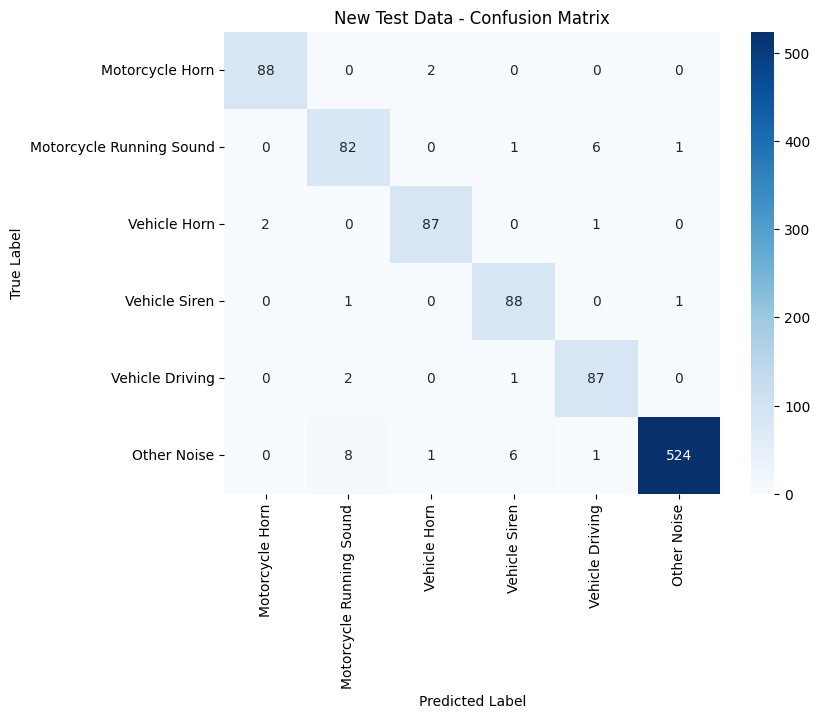


New Test Data Evaluation:
 Accuracy: 0.9657

Classification Report:
                           precision    recall  f1-score   support

         Motorcycle Horn       0.98      0.98      0.98        90
Motorcycle Running Sound       0.88      0.91      0.90        90
            Vehicle Horn       0.97      0.97      0.97        90
           Vehicle Siren       0.92      0.98      0.95        90
         Vehicle Driving       0.92      0.97      0.94        90
             Other Noise       1.00      0.97      0.98       540

                accuracy                           0.97       990
               macro avg       0.94      0.96      0.95       990
            weighted avg       0.97      0.97      0.97       990


--- Sample Predictions ---
1/1 [==============================] - 0s 30ms/step
Sample 0: True = 기타소음, Predicted = 기타소음, Confidence = 1.0000
1/1 [==============================] - 0s 31ms/step
Sample 1: True = 기타소음, Predicted = 기타소음, Confidence = 1.0000
1/1 [========

In [11]:
# test 데이터 변경 : category_03

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#############################################
# Part 0. 모델 로드 및 데이터 로드
#############################################
model_file = "resnet_model_modified_v4.h5"
test_file = "final_test_sampled_90_category_03.csv"  # 새로운 테스트 데이터 파일 경로를 여기에 입력하세요.

loaded_model = load_model(model_file)
test_df = pd.read_csv(test_file)

#############################################
# Part 1. 라벨 매핑 및 인코딩 (학습 데이터와 동일한 라벨 매핑 사용)
#############################################
final_labels = ['이륜차경적', '이륜차주행음', '차량경적', '차량사이렌', '차량주행음', '기타소음']
english_labels = ['Motorcycle Horn', 'Motorcycle Running Sound', 'Vehicle Horn', 'Vehicle Siren', 'Vehicle Driving', 'Other Noise']

label_to_code = {label: i for i, label in enumerate(final_labels)}
unknown_label_index = label_to_code['기타소음']

if 'ood_label' in test_df.columns:
    test_df['encoded_label'] = test_df['ood_label'].map(lambda x: label_to_code.get(x, unknown_label_index))
else:
    raise ValueError("테스트 데이터에 'ood_label' 컬럼이 없습니다.")

y_test = test_df['encoded_label'].values

#############################################
# Part 2. 입력 데이터 준비 (MFCC)
#############################################
mfcc_columns = [f"mfcc_{i}" for i in range(1, 51)]
X_test = test_df[mfcc_columns].values

# Reshape: (samples, 50) -> (samples, 50, 1)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print("X_test shape:", X_test.shape)

#############################################
# Part 3. 평가 함수 정의 및 적용 (영어 라벨 표시)
#############################################
def evaluate_model(model, X, y_true, dataset_name="Test"):
    y_pred_probs = model.predict(X)
    y_pred = np.argmax(y_pred_probs, axis=1)

    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=english_labels, yticklabels=english_labels)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"{dataset_name} - Confusion Matrix")
    plt.show()

    print(f"\n{dataset_name} Evaluation:")
    print(f" Accuracy: {acc:.4f}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=english_labels))
    return acc

# 평가: 테스트 데이터 평가
test_acc = evaluate_model(loaded_model, X_test, y_test, dataset_name="New Test Data")

#############################################
# Part 4. 일부 샘플 예측 결과 출력
#############################################
print("\n--- Sample Predictions ---")
index_to_label = {v: k for k, v in label_to_code.items()}
for i in range(10):
    true_lbl = index_to_label[y_test[i]]
    pred_lbl = index_to_label[np.argmax(loaded_model.predict(X_test[i:i+1]))]
    conf = np.max(loaded_model.predict(X_test[i:i+1]))
    print(f"Sample {i}: True = {true_lbl}, Predicted = {pred_lbl}, Confidence = {conf:.4f}")